In [1]:
# library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import scipy
from scipy.integrate import simps as simps
from random import randrange
from datetime import date
from numpy.random import normal
from numpy.random import uniform
from numpy.random import chisquare
from numpy.random import binomial

from datetime import datetime
import time
import multiprocessing
from multiprocessing import Pool
from functools import partial
import itertools
from scipy.integrate import quad as integrate
from scipy.integrate import simps as simps
from scipy import interpolate as interp
from itertools import product
from scipy.interpolate import interp1d
from tqdm import tqdm


from scipy.interpolate import interp1d

from numpy import pi, sin, cos, exp
# ------------

import seaborn as sns

from scipy.linalg import expm
from matplotlib.animation import FuncAnimation

from numpy.linalg import pinv,inv,norm,matrix_rank
from scipy.linalg import sqrtm 

from scipy.stats import chi2, wishart

from numpy.random import multivariate_normal

from math import sin,cos
from numpy import pi

from sklearn.gaussian_process.kernels import Matern

from statistics import mode

from sklearn.decomposition import PCA

from scipy.optimize import minimize

from scipy.linalg import lapack


from scipy import signal
from scipy.fftpack import fft,rfft, irfft, ifft, dct, idct, dst, idst, fftshift, fftfreq


from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d



inds_cache = {}

import geopandas


from sklearn.cluster import KMeans, DBSCAN,AffinityPropagation


# Day 1

In [8]:
import os
import numpy as np

filename = 'input_1.txt'
data = []
with open(filename) as fp:
    lines = fp.readlines()
_single_data = []
for line in lines:
    if line != '\n':
        _single_data.append(line[:-1]) 
    else:
        _single_data = np.array(_single_data).astype(int).sum()
        data.append(_single_data)
        _single_data = []
data = np.array(data)

print('Part 1: {}'.format(np.max(data)))

print('Part 2: {}'.format(np.sort(data)[-3:].sum()))



Part 1: 67016
Part 2: 200116


# Day 2

In [5]:
import os
import numpy as np

# A,X : rock
# B,Y : paper
# C,Z : scizzords 
choicescore = {'X':1,'Y':2,'Z':3}
XYZ_to_ABC = {'X':'A','Y':'B','Z':'C'}


def didwin(ABC, XYZ):
    win = None
    if ABC == 'A':
        if XYZ == 'Y':
            win = True
        if XYZ == 'Z':
            win = False
    
    if ABC == 'B':
        if XYZ == 'X':
            win = False
        if XYZ == 'Z':
            win = True 
        
    if ABC == 'C':
        if XYZ == 'X':
            win = True
        if XYZ == 'Y':
            win = False 
    return win
    
    
def getscore(ABC,XYZ):
    win = didwin(ABC, XYZ)
    if ABC == XYZ_to_ABC[XYZ]:
        score = choicescore[XYZ]+3
    if win is False:
        score = choicescore[XYZ]
    if win is True:
        score = choicescore[XYZ]+6
    return score

filename = 'input_2.txt'

data = []

with open(filename) as fp:
    lines = fp.readlines()
opponent = []; you = []
for line in lines:
        opponent.append(line[0])
        you.append(line[2])
opponent = np.array(opponent)
you = np.array(you)

scores = []
for ABC,XYZ in zip(opponent,you):
    scores.append(getscore(ABC,XYZ))
totscore = np.array(scores).sum()
print('Part 1: {}'.format(totscore))


XYZ_to_ABC = {'X':'A','Y':'B','Z':'C'}
ABC_to_XYZ = {'A':'X','B':'Y','C':'Z'}
playtowin = {'A': 'Y', 'B': 'Z', 'C' : 'X' }
playtolose = {'A': 'Z', 'B': 'X', 'C' : 'Y' }

def get_whatyouplay(ABC,XYZ):
    if XYZ == 'X': # need to lose
        whatyouplay = playtolose[ABC]
    if XYZ == 'Z': # need to win
        whatyouplay = playtowin[ABC]
    if XYZ == 'Y': # need to draw
        whatyouplay = ABC_to_XYZ[ABC]
    return whatyouplay


data = []

with open(filename) as fp:
    lines = fp.readlines()
opponent = []; order = []
for line in lines:
        opponent.append(line[0])
        order.append(line[2])
opponent = np.array(opponent)
order = np.array(order)

you = []
for ABC,XYZ in zip(opponent,order):
    you.append(get_whatyouplay(ABC,XYZ))
you = np.array(you)

scores = []
for ABC,XYZ in zip(opponent,you):
    scores.append(getscore(ABC,XYZ))
totscore2 = np.array(scores).sum()
print('Part 2: {}'.format(totscore2))


Part 1: 13005
Part 2: 11373


# Day 3

In [3]:
import os
import numpy as np
from string import ascii_lowercase,ascii_uppercase
_letters_to_num_ = {v:k+1 for k,v in enumerate(ascii_lowercase)}
_letters_to_num_.update( {v:k+27 for k,v in enumerate(ascii_uppercase)})

filename = 'input_3.txt'

C1s = []; C2s = []
intersection = []
with open(filename) as fp:
    lines = fp.readlines()
for line in lines:
    if line[-1:] == '\n':
        line =line[:-1]; 
    line = [_letters_to_num_[letter] for letter in line] 
    c1 = line[:len(line)//2]; c2 = line[len(line)//2:]
    C1s.append(c1); C2s.append(c2)
    intersection.append(list(set(c1).intersection(set(c2))))
intersection = np.array(intersection).ravel()
print('Part 1: {}'.format(intersection.sum()))


filename = 'input_3.txt'

C1s = []; C2s = []
intersection = []
with open(filename) as fp:
    lines = fp.readlines()
lines = np.array(lines)
Nlines = len(lines)
common_items = []
for i in range(Nlines//3):
    group = []
    for line in lines[3*i:(i+1)*3]:
        if line[-1:] == '\n':
            line =line[:-1]; 
        line = [_letters_to_num_[letter] for letter in line] 
        group.append(line)
    common_item = list(set(group[0]).intersection(set(group[1])).intersection(set(group[2])))
    common_items.append(common_item)
common_items = np.array(common_items).ravel()
print('Part 2: {}'.format(common_items.sum()))


Part 1: 7727
Part 2: 2609


# Day 4

In [2]:
import os
import numpy as np

filename = 'input_4.txt'

with open(filename) as fp:
    lines = fp.readlines()
lines = [line[:-1] if line[-1:] == '\n' else line for line in lines]

C1s = []; C2s = [];
for line in lines:
    ix = np.where(np.array([_ for _ in line])==',')[0][0]
    lineONE = line[:ix]; lineTWO = line[ix+1:]
    ixONE = np.where(np.array([_ for _ in lineONE])=='-')[0][0]
    ixTWO = np.where(np.array([_ for _ in lineTWO])=='-')[0][0]
    C1s.append(np.arange(int(lineONE[:ixONE]), int(lineONE[ixONE+1:])+1))
    C2s.append(np.arange(int(lineTWO[:ixTWO]), int(lineTWO[ixTWO+1:])+1))

n_nested_pairs=0
for c1,c2 in zip(C1s,C2s):
    if set(c1).intersection(set(c2)) == set(c1) or set(c1).intersection(set(c2)) == set(c2):
        n_nested_pairs=n_nested_pairs+1
n_nested_pairs

n_intersecting_pairs=0
for c1,c2 in zip(C1s,C2s):
    if len(set(c1).intersection(set(c2)))>0:
        n_intersecting_pairs=n_intersecting_pairs+1
n_intersecting_pairs

956

# Day 5

In [9]:
filename = 'input_5.txt'

with open(filename) as fp:
    lines = fp.readlines()
lines = [line[:-1] if line[-1:] == '\n' else line for line in lines]

# part 1
initial = { i+1:[] for i in range(9)}
for line in lines[:8][::-1]:
    for i in range(9):
        if line[1+i*4]!= ' ':
            initial[1+i].append(line[1+i*4])

for line in lines[10:]:
    how_many = int(line[5:-12])
    from_ = int(line[-6])
    to_ = int(line[-1])
    for i in range(how_many):
        which_moves = initial[from_][-1]
        which_stays =initial[from_][:-1]
        initial.update({from_: which_stays})
        initial[to_].append(which_moves)
        
ans = [values[-1][0] for values in initial.values()]
print('Part 1: ' +''.join(i[0].upper() for i in ans))

# part 2 
initial = { i+1:[] for i in range(9)}
for line in lines[:8][::-1]:
    for i in range(9):
        if line[1+i*4]!= ' ':
            initial[1+i].append(line[1+i*4])


for line in lines[10:]:
    how_many = int(line[5:-12])
    from_ = int(line[-6])
    to_ = int(line[-1])
    
    how_to_was = initial[to_]
    how_from_was = initial[from_]
    
    which_move = initial[from_][-how_many:]
    which_stay =initial[from_][:-how_many]
    
    initial.update({from_: which_stay})
    initial.update({to_: how_to_was + which_move})
    
ans = [values[-1][0] for values in initial.values()]

print('Part 2: ' +''.join(i[0].upper() for i in ans))


Part 1: VPCDMSLWJ
Part 2: TPWCGNCCG


# Day 6

In [14]:
import numpy as np
filename = 'input_6.txt'
with open(filename) as fp:
    data = fp.readlines()[0]

for i in np.arange(len(data)-4):
    if len(set(data[i:i+4])) == 4:
        print('Part 1: {}'.format(i+4))
        break
        
for i in np.arange(len(data)-14):
    if len(set(data[i:i+14])) == 14:
        print('Part 2: {}'.format(i+14))
        break

Part 2: 1965
Part 2: 2773


# Day 7***

In [13]:
# NOT MY SOLUTION !!!
from os import path
from collections import defaultdict


with open("input_7.txt") as f:
    dirs = defaultdict(int)
    cwd = []
    for line in f.read().splitlines():
        if line.startswith("$ cd"):
            d = line[5:]
            if d == "..":
                cwd.pop()
            else:
                cwd.append(d)
        elif line.startswith("$ ls"):
            continue
        else:
            try:
                dirs["/".join(cwd)] += int(line.split()[0])
            except ValueError:
                pass

for d in sorted(dirs.keys(), key=lambda x: x.count("/"), reverse=True):
    dirs["/".join(d.split("/")[:-1])] += dirs[d]

print("Part 1:", sum(s for s in dirs.values() if s <= 100_000))

free = 70_000_000 - dirs["/"]
needed = 30_000_000 - free
print("Part 2:", min(v for v in dirs.values() if v > needed))

Part 1: 1367870
Part 2: 549173


# Day 8


In [2]:
import numpy as np

filename = 'input_8.txt'
with open(filename) as fp:
    lines = fp.readlines()
data = np.array([[int(lines[i][j]) for i in range(99)] for j in range(99)])

def is_visible(data, i,j):
    out = False
    if (data[i,j] > data[i,:j]).all():
        out = True
    
    if (data[i,j] > data[i,j+1:]).all():
        out = True

    if (data[i,j] > data[i+1:,j]).all():
        out = True
    
    if (data[i,j] > data[:i,j]).all():
        out = True

    return out
    

visibility_matrix = np.array([[is_visible(data,i,j) for i in np.arange(99)] for j in np.arange(99)])
visibility_matrix.sum()

print('Part 1: {}'.format(visibility_matrix.sum()))


def L_vis(data,i,j):
    ix = 0
    if j!=99:
        for ix in np.arange(1,j+1):
            if data[i,j] <= data[i,j-ix]:
                break
    return ix

def R_vis(data,i,j):
    ix = 0
    if j!=0:
        for ix in np.arange(1,99-j):
            if data[i,j] <= data[i,j+ix]:
                break
    return ix

def U_vis(data,i,j):
    ix = 0
    if j!=0:
        for ix in np.arange(1,i+1):
            if data[i,j] <= data[i-ix,j]:
                break
    return ix

def D_vis(data,i,j):
    ix = 0
    if i!=99:
        for ix in np.arange(1,99-i):
            if data[i,j] <= data[i+ix,j]:
                break
    return ix

def viewing_distance(data,i,j):
    return D_vis(data,i,j)*U_vis(data,i,j)*L_vis(data,i,j)*R_vis(data,i,j)

dist_visibility_matrix = np.array([[viewing_distance(data,i,j) for i in np.arange(99)]
                                          for j in (np.arange(99))])


print('Part 2: {}'.format(dist_visibility_matrix.max()))


Part 1: 1713
Part 2: 268464


# Day 9

In [2]:
import numpy as np
from numpy.linalg import norm

filename = 'input_9.txt'
with open(filename) as fp:
    lines = fp.readlines()
    
lines = [line[:-1] if line[-1:] == '\n' else line for line in lines]

directions = [line[0] for line in lines]
steps = np.array([line[2:] for line in lines]).astype(int)

full_steps_H = []
for dir_,n_steps in zip(directions,steps):
    for _ in range(n_steps):
        full_steps_H.append(dir_)

where_is_H_has_been = []
where_is_T_has_been = []

where_is_H = 0; where_is_H_has_been = [where_is_H]
where_is_T = 0;  where_is_T_has_been = [where_is_T]

delta_dict_ = {'R': 1, 'L':-1, 'U': 1j, 'D': -1j}

for dir_ in (full_steps_H):
    where_is_H = where_is_H + delta_dict_[dir_]
    where_is_H_has_been.append(where_is_H)
    if norm(where_is_H - where_is_T) > 2**.5:
        where_is_T =  where_is_H_has_been[-2]
        where_is_T_has_been.append(where_is_T)
    else: 
        where_is_T_has_been.append(where_is_T)
        
print('Part 2: {}'.format(len(set(where_is_H_has_been))))
print('Part 2: {}'.format(len(set(where_is_T_has_been))))
        


Part 2: 6925
Part 2: 6044


----

6925
5919
2384


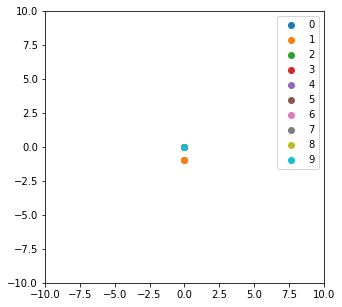

In [258]:
where_is_T = 0; 
where_T_has_been = { i : [] for i in np.arange(0,10)}

where_T_has_been[0].append(0)
for dir_ in full_steps_H:
    where_T_has_been[0].append(where_T_has_been[0][-1] + delta_dict_[dir_])
    
for i in np.arange(1,10):
    ___where_is_T = 0; 
    for j, ___where_is_H in enumerate( where_T_has_been[i-1] ):
        if norm( ___where_is_H - ___where_is_T ) >=2:
            delta = where_T_has_been[i-1][j] - where_T_has_been[i-1][j-1]
            ___where_is_T += signc(delta) #delta.real +1j*delta.imag
        where_T_has_been[i].append(___where_is_T)
        
        
        
print(len(set(where_T_has_been[0])))
print(len(set(where_T_has_been[1])))
print(len(set(where_T_has_been[9])))



which_step = 7

fig,ax = plt.subplots(figsize = (5,5))
for i in np.arange(10):
    ax.scatter(where_T_has_been[i][which_step].real,
               where_T_has_been[i][which_step].imag, label = i)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.legend(); plt.show()


In [ ]:
sign()

In [82]:
len(set(where_T_has_been[9]))

1

In [83]:
where_T_has_been[9]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [84]:
where_is_T_has_been[1][0:10]

TypeError: 'int' object is not subscriptable

In [85]:
where_is_T_has_been[2][28:40]

TypeError: 'complex' object is not subscriptable

In [1019]:
len(where_is_T_has_been[0])

97

In [1020]:
len(where_is_T_has_been[1])

97

In [1021]:
len(where_is_T_has_been[9])

97

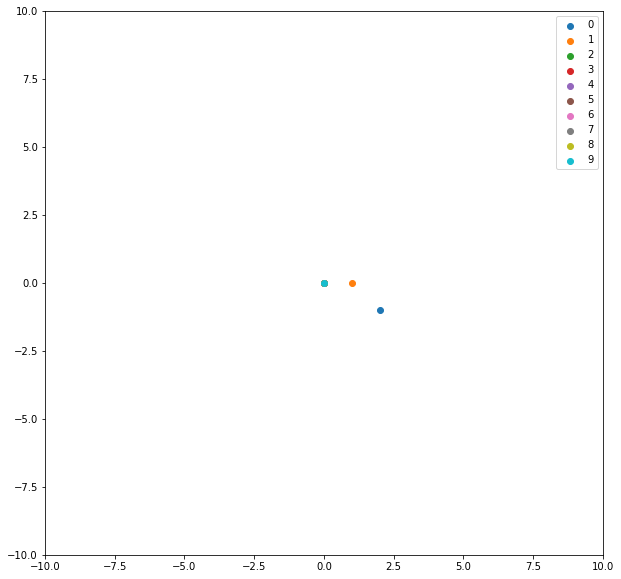

In [75]:
which_step = 13
fig,ax = plt.subplots(figsize = (10,10))
for i in np.arange(10):
    ax.scatter(where_T_has_been[i][which_step].real,
               where_T_has_been[i][which_step].imag, label = i)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.legend(); plt.show()


In [945]:
full_steps_H[:14]

['R', 'R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'L']

In [ ]:
2366

In [256]:
with open("input_9.txt") as f:
    ls = f.read().strip().split("\n")

directions = {"R": 1, "L": -1, "U": 1j, "D": -1j}
moves = [(directions[a], int(b)) for a, b in map(str.split, ls)]

sign = lambda a: (a > 0) - (a < 0)
signc = lambda z: sign(z.real) + sign(z.imag) * 1j

# Part 1
head = 0
tail = 0
visited = {0}

for dz, distance in moves:
    for _ in range(distance):
        head += dz
        delta = head - tail
        if abs(delta) >= 2:
            tail += signc(delta)
        visited.add(tail)

print(len(visited))

# Part 2
parts = [0 for _ in range(10)]  # 0 represents H
visited = {0}
for dz, distance in moves:
    for _ in range(distance):
        parts[0] += dz
        for i in range(1, 10):
            delta = parts[i - 1] - parts[i]
            if abs(delta) >= 2:
                parts[i] += signc(delta)
        visited.add(parts[-1])

print(len(visited))

6044
2384


# Day 10***

In [111]:
# NOT MY SOLUTION !!!!!
from os import path


with open("input_10.txt") as f:
    part1, part2 = 0, ""
    cycle = 1
    value = 1

    for line in f.read().splitlines():
        if (cycle - 1) % 40 == 0:
            part2 += "\n"
        part2 += "#" if (cycle - 1) % 40 in (value - 1, value, value + 1) else " "
        if cycle in (20, 60, 100, 140, 180, 220):
            part1 += cycle * value

        if line.startswith("noop"):
            cycle += 1
        else:
            if cycle % 40 == 0:
                part2 += "\n"
            part2 += "#" if cycle % 40 in (value - 1, value, value + 1) else " "
            if cycle + 1 in (20, 60, 100, 140, 180, 220):
                part1 += (cycle + 1) * value
            cycle += 2
            value += int(line.split()[1])

    print("Part 1:", part1)
    print("Part 2:", part2)
    

Part 1: 14060
Part 2: 
###   ##  ###  #  # #### #  # ####   ## 
#  # #  # #  # # #  #    # #  #       # 
#  # #  # #  # ##   ###  ##   ###     # 
###  #### ###  # #  #    # #  #       # 
#    #  # #    # #  #    # #  #    #  # 
#    #  # #    #  # #    #  # ####  ##  


In [110]:
# # filename = 'input_10.txt'
# filename = 'test_10.txt'

# with open(filename) as fp:
#     lines = fp.readlines()    
# lines = [line[:-1] if line[-1:] == '\n' else line for line in lines]
# lines = [line if line!='noop' else 'addx 0' for line in lines]
# lines = [int(line[5:]) for line in lines]
# values = [0,0]
# for line in (lines):
#     current_value = values[-1]
#     values.append( current_value + line)
    
    

# [cycle * values[cycle] for cycle in np.arange(20,260,40)]

# Day 11

In [5]:
filename = 'input_11.txt'
with open(filename) as fp:
    lines = fp.readlines()    
lines = [line[:-1] if line[-1:] == '\n' else line for line in lines]


starting_items = {i : [int(s) for s in lines[1 + i*7][18:].split(',') ] for i in range(8) }
operations = {i : lines[2 + i*7][19:] for i in range(8)}
test_div = {i : int(lines[3 + i*7][21:]) for i in range(8)}
if_true = {i : int(lines[4 + i*7][-1]) for i in range(8)}
if_false = {i : int(lines[5 + i*7][-1]) for i in range(8)}


op = lambda operation , old: eval(f"({operation})")

counts = np.zeros(8)
for _ in range(20):
    for i in np.arange(8):
        start_ = starting_items[i]  
        starting_items.update({i:[]})
        for old_ in start_:
            counts[i] += 1
            new_ = op(operations[i], old_)//3
            toix = if_true[i] if new_ % test_div[i] == 0 else if_false[i]
            starting_items[toix].append(new_)
                        

print('Part 1: {}'.format(np.sort(counts)[-1]*np.sort(counts)[-2]))

filename = 'input_11.txt'
with open(filename) as fp:
    lines = fp.readlines()    
lines = [line[:-1] if line[-1:] == '\n' else line for line in lines]


starting_items = {i : [int(s) for s in lines[1 + i*7][18:].split(',') ] for i in range(8) }
operations = {i : lines[2 + i*7][19:] for i in range(8)}
test_div = {i : int(lines[3 + i*7][21:]) for i in range(8)}
if_true = {i : int(lines[4 + i*7][-1]) for i in range(8)}
if_false = {i : int(lines[5 + i*7][-1]) for i in range(8)}


op = lambda operation , old: eval(f"({operation})")

BigNumHandler = np.prod(list(test_div.values()))

counts = np.zeros(8)
for _ in np.arange(10000):
    for i in np.arange(8):
        start_ = starting_items[i]  
        starting_items.update({i:[]})
        for old_ in start_:
            counts[i] += 1
            new_ = op(operations[i], old_)% BigNumHandler
            toix = if_true[i] if new_ % test_div[i] == 0 else if_false[i]
            starting_items[toix].append(new_)
                        

print('Part 1: {}'.format(np.sort(counts)[-1]*np.sort(counts)[-2]))


Part 1: 151312.0
Part 1: 51382025916.0


# Day 12

In [6]:
from string import ascii_lowercase
from collections import defaultdict
import numpy as np

def manhattan(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1]) 
def BFS_SP(graph, start, goal):
    explored = []
    queue = [[start]]
    if start == goal:
        return
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                if neighbour == goal:
                    return new_path
            explored.append(node)
    return []

filename = 'input_12.txt'

with open(filename) as fp:
    lines = fp.read().splitlines()
data = np.array([list(line) for line in lines])
_letters_to_num_ = {v:k for k,v in enumerate(ascii_lowercase)}
_letters_to_num_.update({"S":_letters_to_num_['a']});
_letters_to_num_.update({"E":_letters_to_num_['z']});


class vertex_class (object):
    def __init__(self, i,j):
            self.letter = data[i,j];
            self.height = _letters_to_num_[data[i,j]]   
            self.ix = (i,j)
    def __repr__(self):
        return self.letter
    
vertices = np.array([ vertex_class(i,j) for i in range(data.shape[0])  for j in range(data.shape[1])  ])

edges = set()
graph = defaultdict(list)

for vertex_i in vertices:
    for vertex_j in vertices:
        if  (manhattan(vertex_i.ix, vertex_j.ix) ==1):
            if (vertex_j.height - vertex_i.height) <= 1 :
                edges.add((vertex_i.ix,vertex_j.ix))

graph = defaultdict(list)
for edge in edges:
    a, b = edge[0], edge[1]; graph[a].append(b); 

            

start_vertex = [vertex.ix for vertex in vertices if  vertex.letter =='S'][0]
end_vertex = [vertex.ix for vertex in vertices if  vertex.letter =='E'][0]

sp = BFS_SP(graph, start_vertex, end_vertex); 
print('Part 1 : {}'.format(len(sp)-1)  )

start_vertices = [vertex.ix for vertex in vertices if  (vertex.height ==0 )]

_lens = [ len( BFS_SP(graph, start_vertex, end_vertex))-1 for start_vertex in start_vertices]
_lens = [_ for _ in _lens if _>= 0]
print('Part 2 : {}'.format(min(_lens))  )

Part 1 : 330
Part 2 : 321


In [106]:
filename = 'input_12.txt'
# filename = 'test_12.txt'

with open(filename) as fp:
    lines = fp.read().splitlines()
data = np.array([list(line) for line in lines])
_letters_to_num_ = {v:k for k,v in enumerate(ascii_lowercase)}
_letters_to_num_.update({"S":_letters_to_num_['a']});
_letters_to_num_.update({"E":_letters_to_num_['z']});


class vertex_class (object):
    def __init__(self, i,j):
            self.letter = data[i,j];
            self.height = _letters_to_num_[data[i,j]]   #ord(data[i,j])
            self.ix = (i,j)
    def __repr__(self):
        return self.letter
    
vertices = np.array([ vertex_class(i,j) for i in range(data.shape[0])  for j in range(data.shape[1])  ])

edges = set()
graph = defaultdict(list)

for vertex_i in vertices:
    for vertex_j in vertices:
        if  (manhattan(vertex_i.ix, vertex_j.ix) ==1):
            if (vertex_j.height - vertex_i.height) <= 1 :
                edges.add((vertex_i.ix,vertex_j.ix))

graph = defaultdict(list)
for edge in edges:
    a, b = edge[0], edge[1]; graph[a].append(b); 

            

start_vertex = [vertex.ix for vertex in vertices if  vertex.letter =='S'][0]
end_vertex = [vertex.ix for vertex in vertices if  vertex.letter =='E'][0]

sp = BFS_SP(graph, start_vertex, end_vertex); 
print('Part 1 : {}'.format(len(sp)-1)  )

Part 1 : 330


In [110]:
start_vertices = [vertex.ix for vertex in vertices if  (vertex.height ==0 )]

_lens = [ len( BFS_SP(graph, start_vertex, end_vertex))-1 for start_vertex in start_vertices]
_lens = [_ for _ in _lens if _>= 0]
print('Part 2 : {}'.format(min(_lens))  )

100%|█████████████████████████████████████████| 665/665 [00:49<00:00, 13.44it/s]

Part 2 : 321


In [43]:
def BFS_SP(graph, start, goal):
    explored = []
    queue = [[start]]
    if start == goal:
        return
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                if neighbour == goal:
                    print("Shortest path = ", *new_path)
                    return new_path
            explored.append(node)
    return []

def shortest_path(graph, node1, node2):
    path_list = [[node1]]
    path_index = 0
    # To keep track of previously visited nodes
    previous_nodes = {node1}
    if node1 == node2:
        return path_list[0]
        
    while path_index < len(path_list):
        current_path = path_list[path_index]
        last_node = current_path[-1]
        next_nodes = graph[last_node]
        # Search goal node
        if node2 in next_nodes:
            current_path.append(node2)
            return current_path
        # Add new paths
        for next_node in next_nodes:
            if not next_node in previous_nodes:
                new_path = current_path[:]
                new_path.append(next_node)
                path_list.append(new_path)
                # To avoid backtracking
                previous_nodes.add(next_node)
        # Continue to next path in list
        path_index += 1
    # No path is found
    return []

def dijkstra(self, src):
 
        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]
 
        self.printSolution(dist)

# Day 13

In [10]:
import ast
data = open('input_13.txt').read().strip().split("\n\n")

def compare(a, b):
    if type(a) == int:
        if type(b) == int:
            return (a > b) - (a < b)
        return compare([a], b)
    if type(b) == int:
        return compare(a, [b])
    for aa, bb in zip(a, b):
        if r := compare(aa, bb):
            return r
    return compare(len(a), len(b))

_raveled_data = []
scores = []
for ix in range(len(data)):
    L,R = data[ix].split('\n'); L, R = ast.literal_eval(L), ast.literal_eval(R)
    scores.append(compare(L,R))
    _raveled_data.append(L); _raveled_data.append(R)
scores = np.array(scores)

part1 = (np.where(scores==-1)[0] +1).sum()
print('Part 1: {}'.format(part1))

# ====

_raveled_data.append([[2]]); _raveled_data.append([[6]])
# _raveled_data.sort(key=cmp_to_key(compare))

part2 = 1
for i, p in enumerate(_raveled_data):
        if p == [[2]]:
            part2 *= i + 1
        if p == [[6]]:
            part2 *= i + 1
print('Part 1: {}'.format(part2))


Part 1: 4734
Part 1: 90902


# Day 14

In [2]:
import numpy as np 
data = open('input_14.txt').read().split("\n")
data = [_.split('->') for _ in data]

from collections import defaultdict
occupied = defaultdict(list)
rocks = occupied.copy()
            
for traj in data:
    for xyS,xyE in zip(traj[:-1],traj[1:]):
        (xS,yS) = eval(xyS.strip()); (xE,yE) = eval(xyE.strip());
        if xS == xE:
            for y in np.arange(min([yS,yE]), max([yS,yE])+1) :
                occupied[(xS,y)] = 'occupied'
        if yS == yE:
            for x in np.arange(min([xS,xE]), max([xS, xE])+1) :
                occupied[(x,yS)] = 'occupied'

rocks = occupied.copy()
max_y_height = max([y for (x,y) in rocks.keys()])

        
def whereIfall(loc,max_y_height):
    x,y = loc
    if y < max_y_height:
        if occupied[x,y+1] != 'occupied':
            return (x,y+1)
        if occupied[x-1,y+1] != 'occupied':
            return (x-1,y+1)
        if occupied[x+1,y+1] != 'occupied':
            return (x+1,y+1)
        else:
            return (x,y)
    else:    
        return (x,y)
    

def new_fall(loc,max_y_height):
    x,y = loc
    if whereIfall((x,y),max_y_height) == (x,y):
        return (x,y)
    else:
        return new_fall(whereIfall((x,y),max_y_height),max_y_height)

start_x = 500; start_y =0

i=0; y = 0
while y < max_y_height:
    (x,y) = new_fall((start_x,start_y),max_y_height)
    occupied[x,y] = 'occupied'
    i = i+1
print('Part 1: {}'.format(i-1))

occupied = rocks.copy()
max_y_height = max_y_height + 1
i=0; y = 0
while (x,y) != (start_x,start_y):
    (x,y) = new_fall((start_x,start_y),max_y_height)
    occupied[x,y] = 'occupied'
    i = i+1
print('Part 2: {}'.format(i))
    


Part 1: 610
Part 2: 27194


# Day 15

In [5]:
import numpy as np
from tqdm import tqdm

def get_xy(_string_):
    _string_x, _string_y = _string_.split(', ')
    return  eval(_string_x[2:]) + eval(_string_y[2:])*1j

def manhattan(a, b):
    return abs(a.real-b.real) + abs(a.imag-b.imag) 

def get_intersection_of_manhattan_ball_on_hline(center, radius, yline):
    if yline in np.arange(center.imag - radius, center.imag + radius +1):
        dist = radius - np.abs(center.imag - yline)
        return set( yline*1j + center.real + delta_x  for delta_x in np.arange( - dist, dist+1))  
    else:
        return set()

def get_manhattan_sphere(center, radius):
    s = set( center + (radius - split) + split*1j  for split in range(0, radius+1))
    s  = s.union(set( center - (radius - split) + split*1j  for split in range(0, radius+1)))
    s  = s.union(set( center + (radius - split) - split*1j  for split in range(0, radius+1)))
    s  = s.union(set( center - (radius - split) - split*1j  for split in range(0, radius+1)))
    return  s

data = np.array([_[10:].split(': closest beacon is at ') for _ in open('input_15.txt').read().split("\n")])
sensors  = np.array([get_xy(line) for line in data[:,0]])
beacons  = np.array([get_xy(line) for line in data[:,1]])
distances = np.array([manhattan(s,b) for s,b in zip(sensors,beacons)]).astype(int)

no_beacon_here = set()
yline = 2000000
for center, radius in zip(sensors, distances):
    covered_ = get_intersection_of_manhattan_ball_on_hline(center, radius, yline)
    no_beacon_here = no_beacon_here.union(covered_)
print('Part 1 : {}'.format(len(no_beacon_here)-1))

spheres = []
for center, radius in tqdm( zip(sensors, distances), total = sensors.size):
    s = get_manhattan_sphere(center, radius+1); 
    spheres.append(s)

candidates = set()
for i, c1, s1, r1 in zip(np.arange(len(sensors)), sensors, spheres, distances):
    for c2,s2,r2 in zip(sensors[i+1:], spheres[i+1:], distances[i+1:]):
        if manhattan(c1,c2) == r1+r2+2:
            candidates = candidates.union(s1.intersection(s2))

real_candidates = candidates.copy()
for element in tqdm(candidates):
    for center, radius in zip(sensors,distances):
        if manhattan(element,center) <= radius:
            real_candidates.remove(element)
            break
            
print('Part 2 : {}'.format(list(real_candidates)[0].real *4000000 + list(real_candidates)[0].imag))

Part 1 : 4873353


100%|██████████████████████████████| 1036284/1036284 [00:25<00:00, 41348.82it/s]

Part 2 : 11600823139120.0


----

In [153]:
M = 4000000

def get_manhattan_ball(center, radius):
    elements = set()
    for split in range(radius+1):
        elements = elements.union(
            set(center + delta_x + delta_y*1j for delta_x in range(-split, split+1)
                                              for delta_y in range(-(radius - split), (radius - split)+1)))     
    return elements

def isInRange(element, M):
    if ( element.real >= 0) and ( element.imag >= 0) and ( element.real < M) and ( element.imag < M):
        return True
    else:
        return False
    
def isOnBoundary( element, M ):
    if ((element.real == 0) or (element.real == M)) and (element.imag in range(M+1)):
        return True
    if ((element.imag == 0) or (element.imag == M)) and (element.real in range(M+1)):
        return True
    else:
        return False
#     candidates = candidates.union(set(element for element in s1 if isOnBoundary(element,M)))    
    

100%|██████████████████████████████| 1036284/1036284 [00:20<00:00, 49963.69it/s]

None


----

In [254]:
# data = np.array([_.split('; ') for _ in open('input_16.txt').read().split("\n")])
# nodes = [line[6:8]  for line in data[:,0] ]
# flows = { line[6:8] : eval(line.split('=')[-1]) for line in data[:,0] }
# graph = {  line1[6:8]  : getConnection(line2) for line1, line2 in data} 
# edges = [(key, value) for (key,values) in graph.items() for value in values]; 

----

# Day 16

In [2]:
import numpy as np
import gurobipy
import pyomo.environ as pyo
from time import perf_counter

def getConnection(line2):
    try:
        connections =  line2.split('tunnels lead to valves ')[1].split(', ')
    except:
        connections = line2.split('tunnel leads to valve ')[1]
    return connections

data = np.array([_.split('; ') for _ in open('input_16.txt').read().split("\n")])
nodes = [line[6:8]  for line in data[:,0] ]
flow_rates = { line[6:8] : eval(line.split('=')[-1]) for line in data[:,0] }
graph = {  line1[6:8]  : getConnection(line2) for line1, line2 in data} 
edges = [(key, value) for (key,values) in graph.items() for value in values]; 


edges.append(('AA','AA'))

def max_pressure(nodes,edges,flow_rates):             
    model = pyo.ConcreteModel('Max pressure release')

    model.time_shift = pyo.Set(initialize=list(range(1,31)))
    model.shift_time_shift = pyo.Set(initialize=list(range(0,31)))

    model.nodes = pyo.Set(initialize=nodes)
    model.edges = pyo.Set(initialize=edges)

    model.flow_rates = pyo.Param(model.nodes, initialize=flow_rates)

    model.open_node = pyo.Var(model.nodes, model.shift_time_shift, domain=pyo.Binary)
    model.on_edge = pyo.Var(model.edges, model.shift_time_shift, domain=pyo.Binary)


    @model.Objective(sense = pyo.maximize)
    def total_pressure(m):
        return sum(m.open_node[i,t]*m.flow_rates[i]*(30-t) for t in m.time_shift for i in m.nodes)

    @model.Constraint(model.edges)
    def start_at_AA(m,i,j):
        if i==j:
            return m.on_edge[i,j,0]==1
        else:
            return m.on_edge[i,j,0]==0

    @model.Constraint(model.shift_time_shift)
    def either_open_or_move(m, t):
        return sum(m.open_node[i,t] for i in m.nodes) +  sum(m.on_edge[j,k,t] for j,k in m.edges) <=1

    @model.Constraint(model.nodes)
    def open_only_once(m,i):
        return sum(m.open_node[i, t] for t in m.shift_time_shift) <= 1
    
    @model.Constraint(model.nodes, model.time_shift)
    def consecutive_actions(m,i,t):
        return sum(m.on_edge[j,k,t] for j,k in edges if j ==i) + m.open_node[i,t] <= \
               sum(m.on_edge[k,l,t-1] for k,l in edges if l == i)  + m.open_node[i,t-1]
        

    result = pyo.SolverFactory('gurobi').solve(model)
    print(f'Solver status: {result.solver.status}, {result.solver.termination_condition}')

    print(f'\n Part 1 : Max pressure that can be released is {int(pyo.value(model.total_pressure()))}')
    
    return model

tstart = perf_counter()
m = max_pressure(nodes,edges,flow_rates)
tend = perf_counter()
print(f'\nElapsed time: {tend-tstart:.4f} seconds\n')


# ----

def max_pressure_with_elephant(nodes,edges,flow_rates):             
    model = pyo.ConcreteModel('Max pressure release')

    model.time = pyo.Set(initialize=list(range(0,26)))
    model.time_shift = pyo.Set(initialize=list(range(1,27)))
    model.shift_time_shift = pyo.Set(initialize=list(range(0,27)))

    model.nodes = pyo.Set(initialize=nodes)
    model.edges = pyo.Set(initialize=edges)

    model.flow_rates = pyo.Param(model.nodes, initialize=flow_rates)

    model.open_node = pyo.Var(model.nodes, model.shift_time_shift, domain=pyo.Binary)
    model.e_open_node = pyo.Var(model.nodes, model.shift_time_shift, domain=pyo.Binary)
    model.on_edge = pyo.Var(model.edges, model.shift_time_shift, domain=pyo.Binary)
    model.e_on_edge = pyo.Var(model.edges, model.shift_time_shift, domain=pyo.Binary)


    @model.Objective(sense = pyo.maximize)
    def total_pressure(m):
        return sum(m.open_node[i,t]*m.flow_rates[i]*(26-t) for t in m.time_shift for i in m.nodes) + \
               sum(m.e_open_node[i,t]*m.flow_rates[i]*(26-t) for t in m.time_shift for i in m.nodes)

    @model.Constraint(model.edges)
    def start_at_AA(m,i,j):
        if i==j:
            return m.on_edge[i,j,0] + m.e_on_edge[i,j,0] == 2
        else:
            return m.on_edge[i,j,0] + m.e_on_edge[i,j,0] == 0
        

    @model.Constraint(model.shift_time_shift)    
    def either_open_or_move(m, t):
        return sum(m.open_node[i,t] for i in m.nodes) +  sum(m.on_edge[j,k,t] for j,k in m.edges) <=1
   
    @model.Constraint(model.shift_time_shift)    
    def e_either_open_or_move(m, t):
        return sum(m.e_open_node[i,t] for i in m.nodes) +  sum(m.e_on_edge[j,k,t] for j,k in m.edges) <=1

    @model.Constraint(model.nodes)
    def open_only_once(m,i):
        return sum(m.open_node[i, t] for t in m.shift_time_shift) +\
                  sum(m.e_open_node[i, t] for t in m.shift_time_shift) <= 1
    
    @model.Constraint(model.nodes, model.time_shift)
    def consecutive_actions(m,i,t):
        return sum(m.on_edge[j,k,t] for j,k in edges if j ==i) + m.open_node[i,t] <= \
               sum(m.on_edge[k,l,t-1] for k,l in edges if l == i)  + m.open_node[i,t-1]
        
    @model.Constraint(model.nodes, model.time_shift)
    def e_consecutive_actions(m,i,t):
        return sum(m.e_on_edge[j,k,t] for j,k in edges if j ==i) + m.e_open_node[i,t] <= \
               sum(m.e_on_edge[k,l,t-1] for k,l in edges if l == i)  + m.e_open_node[i,t-1]
        


    result = pyo.SolverFactory('gurobi').solve(model)
    print(f'Solver status: {result.solver.status}, {result.solver.termination_condition}')

    print(f'\n Part 2: Max pressure that can be released is {int(pyo.value(model.total_pressure()))}')
    
    return model

tstart = perf_counter()
m = max_pressure_with_elephant(nodes,edges,flow_rates)
tend = perf_counter()
print(f'\nElapsed time: {tend-tstart:.4f} seconds\n')


Solver status: ok, optimal

 Part 1 : Max pressure that can be released is 1653

Elapsed time: 4.7838 seconds

Solver status: ok, optimal

Part 2: Max pressure that can be released is 2223

Elapsed time: 9.0063 seconds



In [3]:
def max_pressure(nodes,edges,flow_rates):             
    model = pyo.ConcreteModel('Max pressure release')

    model.time_shift = pyo.Set(initialize=list(range(1,31)))
    model.shift_time_shift = pyo.Set(initialize=list(range(0,31)))

    model.nodes = pyo.Set(initialize=nodes)
    model.edges = pyo.Set(initialize=edges)

    model.flow_rates = pyo.Param(model.nodes, initialize=flow_rates)

    model.open_node = pyo.Var(model.nodes, model.shift_time_shift, domain=pyo.Binary)
    model.on_edge = pyo.Var(model.edges, model.shift_time_shift, domain=pyo.Binary)


    @model.Objective(sense = pyo.maximize)
    def total_pressure(m):
        return sum(m.open_node[i,t]*m.flow_rates[i]*(30-t) for t in m.time_shift for i in m.nodes)

    @model.Constraint(model.edges)
    def start_at_AA(m,i,j):
        if i==j:
            return m.on_edge[i,j,0]==1
        else:
            return m.on_edge[i,j,0]==0

    @model.Constraint(model.shift_time_shift)
    def either_open_or_move(m, t):
        return sum(m.open_node[i,t] for i in m.nodes) +  sum(m.on_edge[j,k,t] for j,k in m.edges) <=1

    @model.Constraint(model.nodes)
    def open_only_once(m,i):
        return sum(m.open_node[i, t] for t in m.shift_time_shift) <= 1
    
    @model.Constraint(model.nodes, model.time_shift)
    def consecutive_actions(m,i,t):
        return sum(m.on_edge[j,k,t] for j,k in edges if j ==i) + m.open_node[i,t] <= \
               sum(m.on_edge[k,l,t-1] for k,l in edges if l == i)  + m.open_node[i,t-1]
        

    result = pyo.SolverFactory('gurobi').solve(model)
    print(f'Solver status: {result.solver.status}, {result.solver.termination_condition}')

    print(f'\nMax pressure that can be released: {int(pyo.value(model.total_pressure()))}')
    
    return model

In [4]:
tstart = perf_counter()
m = max_pressure(nodes,edges,flow_rates)
tend = perf_counter()
print(f'\nElapsed time: {tend-tstart:.4f} seconds\n')


Solver status: ok, optimal

Max pressure that can be released: 1653

Elapsed time: 4.5773 seconds



----

In [441]:
def max_pressure_with_elephant(nodes,edges,flow_rates):             
    model = pyo.ConcreteModel('Max pressure release')

    model.time = pyo.Set(initialize=list(range(0,26)))
    model.time_shift = pyo.Set(initialize=list(range(1,27)))
    model.shift_time_shift = pyo.Set(initialize=list(range(0,27)))

    model.nodes = pyo.Set(initialize=nodes)
    model.edges = pyo.Set(initialize=edges)

    model.flow_rates = pyo.Param(model.nodes, initialize=flow_rates)

    model.open_node = pyo.Var(model.nodes, model.shift_time_shift, domain=pyo.Binary)
    model.e_open_node = pyo.Var(model.nodes, model.shift_time_shift, domain=pyo.Binary)
    model.on_edge = pyo.Var(model.edges, model.shift_time_shift, domain=pyo.Binary)
    model.e_on_edge = pyo.Var(model.edges, model.shift_time_shift, domain=pyo.Binary)


    @model.Objective(sense = pyo.maximize)
    def total_pressure(m):
        return sum(m.open_node[i,t]*m.flow_rates[i]*(26-t) for t in m.time_shift for i in m.nodes) + \
               sum(m.e_open_node[i,t]*m.flow_rates[i]*(26-t) for t in m.time_shift for i in m.nodes)

    @model.Constraint(model.edges)
    def start_at_AA(m,i,j):
        if i==j:
            return m.on_edge[i,j,0] + m.e_on_edge[i,j,0] == 2
        else:
            return m.on_edge[i,j,0] + m.e_on_edge[i,j,0] == 0
        

    @model.Constraint(model.shift_time_shift)    
    def either_open_or_move(m, t):
        return sum(m.open_node[i,t] for i in m.nodes) +  sum(m.on_edge[j,k,t] for j,k in m.edges) <=1
   
    @model.Constraint(model.shift_time_shift)    
    def e_either_open_or_move(m, t):
        return sum(m.e_open_node[i,t] for i in m.nodes) +  sum(m.e_on_edge[j,k,t] for j,k in m.edges) <=1

    @model.Constraint(model.nodes)
    def open_only_once(m,i):
        return sum(m.open_node[i, t] for t in m.shift_time_shift) +\
                  sum(m.e_open_node[i, t] for t in m.shift_time_shift) <= 1
    
    @model.Constraint(model.nodes, model.time_shift)
    def consecutive_actions(m,i,t):
        return sum(m.on_edge[j,k,t] for j,k in edges if j ==i) + m.open_node[i,t] <= \
               sum(m.on_edge[k,l,t-1] for k,l in edges if l == i)  + m.open_node[i,t-1]
        
    @model.Constraint(model.nodes, model.time_shift)
    def e_consecutive_actions(m,i,t):
        return sum(m.e_on_edge[j,k,t] for j,k in edges if j ==i) + m.e_open_node[i,t] <= \
               sum(m.e_on_edge[k,l,t-1] for k,l in edges if l == i)  + m.e_open_node[i,t-1]
        


    result = pyo.SolverFactory('gurobi').solve(model)
    print(f'Solver status: {result.solver.status}, {result.solver.termination_condition}')

    print(f'\nMax pressure that can be released: {int(pyo.value(model.total_pressure()))}')
    
    return model

In [442]:
tstart = perf_counter()
m = max_pressure_with_elephant(nodes,edges,flow_rates)
tend = perf_counter()
print(f'\nElapsed time: {tend-tstart:.4f} seconds\n')


Solver status: ok, optimal

Max pressure that can be released: 2223

Elapsed time: 19.0731 seconds



----

In [419]:
# # debugging 
# for t in m.shift_time_shift:
#     if sum([int(pyo.value(m.open_node[i,t])) for i in m.nodes])==1 and sum([int(pyo.value(m.on_edge[i,j,t])) for i,j in m.edges])==0:
#         print(f'At minute {t:2} I open the valve {[nodes[idx] for idx, i in enumerate(m.nodes) if int(pyo.value(m.open_node[i,t]))==1][0]}')
#     elif sum([int(pyo.value(m.open_node[i,t])) for i in m.nodes])==0 and sum([int(pyo.value(m.on_edge[i,j,t])) for i,j in m.edges])==1:
#         fromnode = [nodes[idx] for idx, i in enumerate(m.nodes) if sum(int(pyo.value(m.on_edge[i,j,t])) for j in m.nodes if (i,j) in m.edges)==1][0]
#         tonode = [nodes[idx] for idx, j in enumerate(m.nodes) if sum(int(pyo.value(m.on_edge[i,j,t])) for i in m.nodes if (i,j) in m.edges)==1][0]
#         print(f'At minute {t:2} I move from node {fromnode} to node {tonode}')
#     elif sum([int(pyo.value(m.open_node[i,t])) for i in m.nodes]) + sum([int(pyo.value(m.on_edge[i,j,t])) for i,j in m.edges]) > 1:
#         print('My error')
#     else:
#         print(f'At minute {t:2} I do nothing')

In [420]:
# # pyomo : works but inefficient

# model = pyo.ConcreteModel('Max pressure release')
    
# model.time = pyo.Set(initialize=list(range(0,30)))
# model.time_shift = pyo.Set(initialize=list(range(1,31)))
# model.shift_time_shift = pyo.Set(initialize=list(range(0,31)))

# model.nodes = pyo.Set(initialize=nodes)
# model.edges = pyo.Set(initialize=edges)

# model.flow_rates = pyo.Param(model.nodes, initialize=flows)

# model.open_node = pyo.Var(model.nodes, model.shift_time_shift, domain=pyo.Binary)
# model.on_node = pyo.Var(model.nodes, model.shift_time_shift, domain=pyo.Binary)


# @model.Objective(sense = pyo.maximize)
# def total_pressure(m):
#     return sum(m.open_node[i,t]*m.flow_rates[i]*(30-t) for t in m.time_shift for i in m.nodes)

# @model.Constraint(model.nodes)
# def start_at_AA(m, i):
#         if i == 'AA':
#             return m.on_node[i, 0] == 1
#         else:
#             return m.on_node[i, 0] == 0
        
# @model.Constraint(model.nodes)
# def all_start_closed(m, i):
#     return m.open_node[i, 0] == 0

# @model.Constraint(model.nodes, model.time_shift)
# def valve_can_be_opened_if_on_node_at_previus_step(m, i, t):
#     return m.open_node[i,t] <= m.on_node[i,t-1]

# @model.Constraint(model.nodes, model.time_shift)
# def can_only_open_if_there(m, i, t):
#     return m.open_node[i,t] <= m.on_node[i,t]


# @model.Constraint(model.shift_time_shift)
# def cant_be_two_places_at_the_same_time(m,t):
#     return sum(m.on_node[i, t] for i in m.nodes) == 1

# @model.Constraint(model.nodes)
# def open_only_once(m,i):
#     return sum(m.open_node[i, t] for t in m.shift_time_shift) <= 1



# @model.Constraint(model.time_shift, model.nodes, model.nodes)
# def can_only_move_on_edges(m, t,i,j):
#     if i==j:
#         return m.on_node[i,t-1] + m.on_node[j,t] <= 2
#     elif (i,j) not in m.edges:
#         return m.on_node[i,t-1] + m.on_node[j,t] <= 1
#     elif (i,j) in m.edges:
#         return m.on_node[i,t-1] + m.on_node[j,t] <= 2

    
# result = pyo.SolverFactory('gurobi').solve(model)
# print(f'Solver status: {result.solver.status}, {result.solver.termination_condition}')

# int(pyo.value(model.total_pressure()))

In [421]:
# # trying_greedy 

# def shortest_path(graph, node1, node2):
#     path_list = [[node1]]
#     path_index = 0
#     # To keep track of previously visited nodes
#     previous_nodes = {node1}
#     if node1 == node2:
#         return path_list[0] 
#     while path_index < len(path_list):
#         current_path = path_list[path_index]
#         last_node = current_path[-1]
#         next_nodes = graph[last_node]
#         # Search goal node
#         if node2 in next_nodes:
#             current_path.append(node2)
#             return current_path
#         # Add new paths
#         for next_node in next_nodes:
#             if not next_node in previous_nodes:
#                 new_path = current_path[:]
#                 new_path.append(next_node)
#                 path_list.append(new_path)
#                 # To avoid backtracking
#                 previous_nodes.add(next_node)
#         # Continue to next path in list
#         path_index += 1
#     # No path is found
#     print('no path found')
#     return []

# data = np.array([_.split('; ') for _ in open('input_16.txt').read().split("\n")])
# valves = [line[6:8]  for line in data[:,0] ]
# valves_no_num = {valve : i for i,valve in enumerate(valves)}

# def getConnection(line2):
#     try:
#         connections = [valves_no_num[_] for _ in line2.split('tunnels lead to valves ')[1].split(', ')]
#     except:
#         connections = [valves_no_num[line2.split('tunnel leads to valve ')[1]]]
#     return connections

# valve_flow_rates = {valves_no_num[ line[6:8] ] : eval(line.split('=')[-1]) for line in data[:,0] }
# edges = { valves_no_num[ line1[6:8] ] : getConnection(line2) for line1, line2 in data} 

# TMAX = 31
# valves_withPositiveFlowRate = [valve for valve, flow in valve_flow_rates.items() if flow>0]
# unvisited = valves_withPositiveFlowRate.copy()

# visited = set()
# released_flow = 0
# path = [valves_no_num['AA']]
# time = 0
# while True:
#     time +=1
    
#     if time == TMAX+1:
#         break
#     released_flow += np.sum([valve_flow_rates[valve] for valve in visited]) if len(visited)>0 else 0    
        
# #     cost_to_unvisited = [valve_flow_rates[valve]/len(shortest_path(edges, path[-1], valve)) 
# #                      for valve in  unvisited]

#     cost_to_unvisited = [valve_flow_rates[valve]*((TMAX-time)-len(shortest_path(edges, path[-1], valve))-1)
#                      for valve in  unvisited]
    
#     which_to_visit = unvisited[np.argmax(cost_to_unvisited)]
#     continuation = shortest_path(edges, path[-1], which_to_visit)
#     for newstep in continuation:
#         path.append(newstep)
#         visited.add(newstep)
#         released_flow += np.sum([valve_flow_rates[valve] for valve in set(visited)]) if len(visited)>0 else 0
#         time +=1
#         if time == TMAX:
#             break
#     unvisited.remove(which_to_visit)


# print(released_flow)

# def cost(start, end, time,unvisited, TMAX = TMAX):
#     sp = shortest_path(edges, start, end)
#     score = sum([max([TMAX - (time + n_steps + 1) , 0 ])*valve_flow_rates[valve] 
#              for n_steps, valve in enumerate(sp) if valve in unvisited])
#     return score
    
    

# def shortest_path(graph, node1, node2):
#     path_list = [[node1]]
#     path_index = 0
#     # To keep track of previously visited nodes
#     previous_nodes = {node1}
#     if node1 == node2:
#         return path_list[0] 
#     while path_index < len(path_list):
#         current_path = path_list[path_index]
#         last_node = current_path[-1]
#         next_nodes = graph[last_node]
#         # Search goal node
#         if node2 in next_nodes:
#             current_path.append(node2)
#             return current_path
#         # Add new paths
#         for next_node in next_nodes:
#             if not next_node in previous_nodes:
#                 new_path = current_path[:]
#                 new_path.append(next_node)
#                 path_list.append(new_path)
#                 # To avoid backtracking
#                 previous_nodes.add(next_node)
#         # Continue to next path in list
#         path_index += 1
#     # No path is found
#     print('no path found')
#     return []

# data = np.array([_.split('; ') for _ in open('input_16.txt').read().split("\n")])
# valves = [line[6:8]  for line in data[:,0] ]
# valves_no_num = {valve : i for i,valve in enumerate(valves)}

# def getConnection(line2):
#     try:
#         connections = [valves_no_num[_] for _ in line2.split('tunnels lead to valves ')[1].split(', ')]
#     except:
#         connections = [valves_no_num[line2.split('tunnel leads to valve ')[1]]]
#     return connections

# valve_flow_rates = {valves_no_num[ line[6:8] ] : eval(line.split('=')[-1]) for line in data[:,0] }
# edges = { valves_no_num[ line1[6:8] ] : getConnection(line2) for line1, line2 in data} 

# TMAX = 30
# valves_withPositiveFlowRate = [valve for valve, flow in valve_flow_rates.items() if flow>0]
# unvisited = valves_withPositiveFlowRate.copy()

# visited = set()
# released_flow = 0
# path = [valves_no_num['AA']]
# time = 1
# while True:
# #     print(time)
#     if time >= TMAX+1:
#         break
#     released_flow += np.sum([valve_flow_rates[valve] for valve in visited]) if len(visited)>0 else 0    
        
#     cost_to_unvisited = [cost(path[-1], valve, time, unvisited)
#                      for valve in  unvisited]
    
#     which_to_visit = unvisited[np.argmax(cost_to_unvisited)]
#     continuation = shortest_path(edges, path[-1], which_to_visit)
#     for newstep in continuation:
#         path.append(newstep)
#         time +=1
#         if newstep in valves_withPositiveFlowRate and newstep not in visited:
#             visited.add(newstep)
#             time +=1
#         released_flow += np.sum([valve_flow_rates[valve] for valve in set(visited)]) if len(visited)>0 else 0
#         if time >= TMAX:
#             break
#     unvisited.remove(which_to_visit)


# print(released_flow)

# visited = set() 
# path = []
# def dfs(visited, graph, node):
#     if node not in visited:
#         visited.add(node); path.append(node)
#         cost_to = [ valve_flow_rates[valve]  / len(shortest_path(edges, node, valve))
#                      for valve in graph[node]]
#         for neighbour in np.array(graph[node])[np.argsort(cost_to)][::-1]:
#             dfs(visited, graph, neighbour)
            
# dfs(visited, edges, 51)

# TMAX = 30
# visited_set = set()
# released_flow = 0 
# time=0
# for valve in path:
#     released_flow += np.sum([valve_flow_rates[valve] for valve in visited]) if len(visited)>0 else 0
#     time = time+1
#     if time == TMAX:
#         break
#     visited_set.add(valve)
# print(released_flow)


# Day 17

In [447]:
####

.#.
###
.#.

..#
..#
###

#
#
#
#

##
##

shapes = {0 : np.array([2,3,4,5]),
          1:  np.array([3,2+1j,3+1j, 4+1j, 3+2j]),
          2:  np.array([2,3,4,4+1j,4+1j]),
          3:  np.array([0,1j,2j,3j]),
          4:  np.array([0,1j,1,1+1j])
         }

data = open('input_17.txt').read()


L,R = -1, 7

def wind(symb, shape, occupied):
    _return = shape
    if symb == '>' and shape.real.max() < R:
        if can_still_move_right(shape,occupied):
            _return = shape+1
    if symb == '<' and shape.real.min() > L:
        if can_still_move_left(shape,occupied):
            _return =  shape-1
    return _return
 
def is_lower_free(loc,occupied):
    if loc-1j in occupied:
        return False
    else:
        return True
    
def is_left_free(loc,occupied):
    if loc-1 in occupied:
        return False
    else:
        return True
    
def is_right_free(loc,occupied):
    if loc+1 in occupied:
        return False
    else:
        return True

def can_still_move_right(shape, occupied):
    if all([is_right_free(loc, occupied) for loc in shape]):
        return True
    else:
        return False
    
def can_still_move_left(shape, occupied):
    if all([is_left_free(loc, occupied) for loc in shape]):
        return True
    else:
        return False
    
def can_still_fall(shape, occupied):
    if all([is_lower_free(loc, occupied) for loc in shape]):
        return True
    else:
        return False
    
h_floor = 0 
i = 0

falls=2022

occupied = set( i for i in range(L,R))
for f in np.arange(falls):
    
    shape = shapes[f % len(shapes.keys())] + (h_floor +3)*1j 
    
    while True:
        symb = data[i % len(data)]
        i +=1
        shape = wind(symb, shape,occupied)
        if can_still_fall(shape, occupied):
            shape = shape-1j
        else:
            break
    for _ in shape:
        occupied.add(_)
    h_floor = shape.imag.max()
h_floor

In [239]:
shapes = {0 : np.array([2,3,4,5]),
          1:  np.array([3,2+1j,3+1j, 4+1j, 3+2j]),
          2:  np.array([2,3,4,4+1j,4+1j]),
          3:  np.array([0,1j,2j,3j]),
          4:  np.array([0,1j,1,1+1j])
         }

In [240]:
data = open('input_17.txt').read()
# data = '>>><<><>><<<>><>>><<<>>><<<><<<>><>><<>>'

In [258]:
L,R = -1, 7

def wind(symb, shape, occupied):
    _return = shape
    if symb == '>' and shape.real.max() < R:
        if can_still_move_right(shape,occupied):
            _return = shape+1
    if symb == '<' and shape.real.min() > L:
        if can_still_move_left(shape,occupied):
            _return =  shape-1
    return _return
 
def is_lower_free(loc,occupied):
    if loc-1j in occupied:
        return False
    else:
        return True
    
def is_left_free(loc,occupied):
    if loc-1 in occupied:
        return False
    else:
        return True
    
def is_right_free(loc,occupied):
    if loc+1 in occupied:
        return False
    else:
        return True

def can_still_move_right(shape, occupied):
    if all([is_right_free(loc, occupied) for loc in shape]):
        return True
    else:
        return False
    
def can_still_move_left(shape, occupied):
    if all([is_left_free(loc, occupied) for loc in shape]):
        return True
    else:
        return False
    
def can_still_fall(shape, occupied):
    if all([is_lower_free(loc, occupied) for loc in shape]):
        return True
    else:
        return False
    
h_floor = 0 
i = 0

falls=2022

occupied = set( i for i in range(L,R))
for f in np.arange(falls):
    
    shape = shapes[f % len(shapes.keys())] + (h_floor +3)*1j 
    
    while True:
        symb = data[i % len(data)]
        i +=1
        shape = wind(symb, shape,occupied)
        if can_still_fall(shape, occupied):
            shape = shape-1j
        else:
            break
    for _ in shape:
        occupied.add(_)
    h_floor = shape.imag.max()
h_floor

1978.0

In [252]:
occupied

{-1, 0, 1, 2, 3, 4, 5, 6}

In [ ]:
3209

In [ ]:
shape = shapes[f % len(shapes.keys())] + (h_floor +3)*1j 
    
    while can_still_fall(shape, occupied):
        symb = data[i % len(data)]
        i +=1
        shape = wind(symb, shape,occupied) -1j
        
    for _ in shape:
        occupied.add(_)

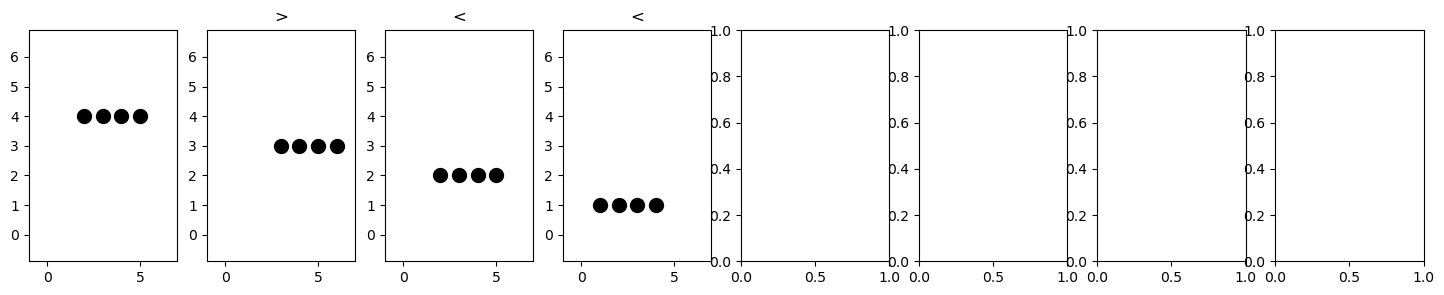

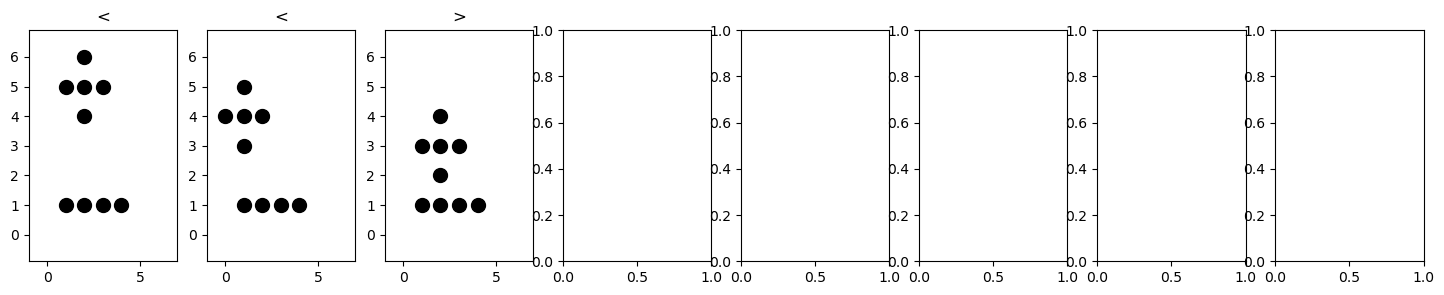

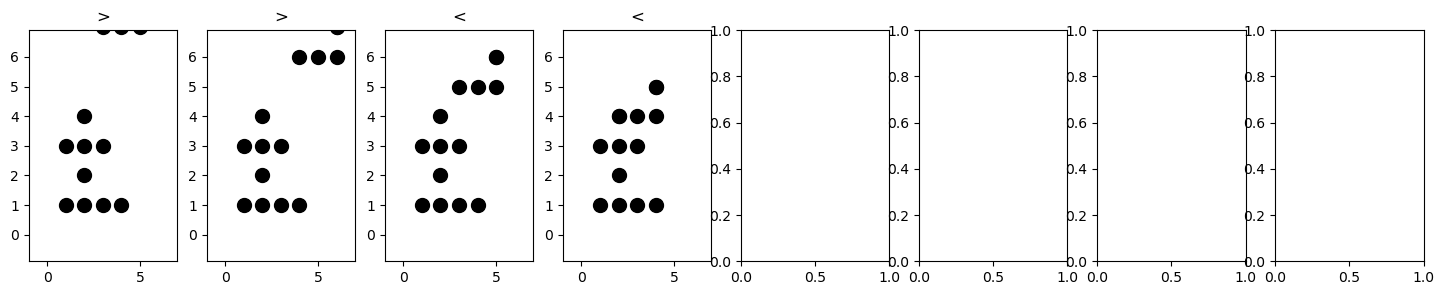

In [249]:
oldshapes = []
h_floor = 0 ; i = 0; f = 0
occupied = set( i for i in range(L,R))


fig, axs = plt.subplots(figsize = (18, 3), ncols= 8)  ; axs = axs.ravel() 
ax = axs[0]
shape = shapes[f % len(shapes.keys())] + (h_floor +4)*1j 
ax.scatter(shape.real,shape.imag,c='k', s=100); ax.set_ylim(-.9,6.9); ax.set_xlim(L,R)


for ax in axs[1:]:
    symb = data[i%len(data)]; 
    i +=1; 
    shape = wind(symb, shape) -1j
    ax.set_title(symb)
    ax.scatter(shape.real,shape.imag,c='k', s=100); ax.set_ylim(-.9,6.9); ax.set_xlim(L,R)
    if not can_still_fall(shape, occupied):
        break
        
for _ in shape:
    occupied.add(_)
h_floor = shape.imag.max()
f +=1
oldshapes.append(shape)

plt.show()




shape = shapes[f % len(shapes.keys())] + (h_floor +4)*1j 
fig, axs = plt.subplots(figsize = (18, 3), ncols= 8)  ; axs = axs.ravel() 
for ax in axs:
    symb = data[i%len(data)]; 
    i +=1; 
    shape = wind(symb, shape) -1j
    ax.set_title(symb)
    ax.scatter(shape.real,shape.imag,c='k', s=100);
    for oldshape in oldshapes:
        ax.scatter(oldshape.real,oldshape.imag,c='k', s=100); 
    ax.set_ylim(-.9,6.9); ax.set_xlim(L,R)
    if not can_still_fall(shape, occupied):
        break
        
for _ in shape:
    occupied.add(_)
h_floor = shape.imag.max()
f +=1
oldshapes.append(shape)

plt.show()


shape = shapes[f % len(shapes.keys())] + (h_floor +4)*1j 
fig, axs = plt.subplots(figsize = (18, 3), ncols= 8)  ; axs = axs.ravel() 
for ax in axs:
    symb = data[i%len(data)]; 
    i +=1; 
    shape = wind(symb, shape) -1j
    ax.set_title(symb)
    ax.scatter(shape.real,shape.imag,c='k', s=100);
    for oldshape in oldshapes:
        ax.scatter(oldshape.real,oldshape.imag,c='k', s=100); 
    ax.set_ylim(-.9,6.9); ax.set_xlim(L,R)
    if not can_still_fall(shape, occupied):
        break
        
for _ in shape:
    occupied.add(_)
h_floor = shape.imag.max()
f +=1
oldshapes.append(shape)

plt.show()

(-1.0, 7.0)

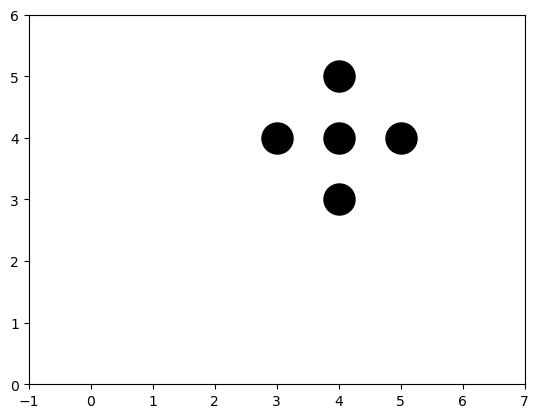

In [179]:
symb = data[i%len(data)]
i +=1
shape = wind(symb, shape) -1j
for loc in shape:
    plt.scatter(loc.real,loc.imag,c='k', s=500)
plt.ylim(0,6)
plt.xlim(L,R)

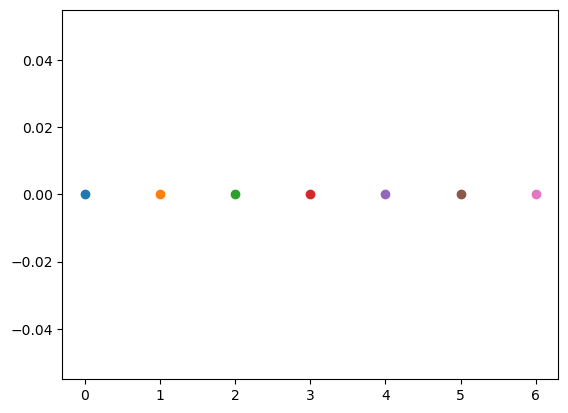

In [159]:
for i in range(L+1,R):
    plt.scatter(i,0)

In [237]:
from os import path
import itertools


shapes = [
    ((0, 0), (1, 0), (2, 0), (3, 0)),
    ((1, 0), (1, -1), (0, -1), (1, -2), (2, -1)),
    ((0, 0), (1, 0), (2, 0), (2, -1), (2, -2)),
    ((0, 0), (0, -1), (0, -2), (0, -3)),
    ((0, 0), (1, 0), (0, -1), (1, -1)),
]


def solve(jets, total_iters):
    jets = itertools.cycle(enumerate(jets))
    blocks = itertools.cycle(enumerate(shapes))
    grid = set((x, 0) for x in range(7))
    min_y = 0
    seen = {}
    i = 0
    found_repeat = False
    while i < total_iters:
        block_i, shape = next(blocks)
        width = max(x for x, _ in shape) + 1
        jet_i, jet = next(jets)
        if not found_repeat:
            for floor_y in range(min_y, -1, 1):
                if all((x, floor_y) in grid for x in range(7)):
                    top = tuple(sorted((x, y - min_y) for x, y in grid if y <= floor_y))
                    if (top, block_i, jet_i) in seen:
                        prev_i, prev_min_y = seen[(top, block_i, jet_i)]
                        period = i - prev_i
                        iters = (total_iters - i) // period
                        i += iters * period
                        y_diff = prev_min_y - min_y
                        min_y -= iters * y_diff
                        gg = list(grid)
                        grid = set()
                        for x, y in gg:
                            grid.add((x, y - iters * y_diff))
                        found_repeat = True
                    seen[(top, block_i, jet_i)] = i, min_y
                    break
        xx, yy = 2, min_y - 4
        while True:
            if jet == "<":
                if xx > 0 and not any(
                    (xx + xd - 1, yy + yd) in grid for xd, yd in shape
                ):
                    xx -= 1
            else:
                if xx + width < 7 and not any(
                    (xx + xd + 1, yy + yd) in grid for xd, yd in shape
                ):
                    xx += 1
            if any((xx + xd, yy + yd + 1) in grid for xd, yd in shape):
                for xd, yd in shape:
                    grid.add((xx + xd, yy + yd))
                break
            yy += 1
            jet_i, jet = next(jets)
        min_y = min(y for _, y in grid)
        i += 1
    return -min_y


with open( "input_17.txt") as f:
    jets = f.read().strip()
    print("Part 1:", solve(jets, 2022))
    print("Part 1:", solve(jets, 1000000000000))

Part 1: 3209
Part 1: 1580758017509


----

# Day 18

In [70]:
def get_all_connected_groups(graph):
    already_seen = set()
    result = []
    for node in graph:
        if node not in already_seen:
            connected_group, already_seen = get_connected_group(node, already_seen)
            result.append(connected_group)
    return result
def get_connected_group(node, already_seen):
        result = []
        nodes = set([node])
        while nodes:
            node = nodes.pop()
            already_seen.add(node)
            nodes = nodes or graph[node] - already_seen
            result.append(node)
        return result, already_seen

class vertex_class (object):
    def __init__(self, i):
            self.name= '{}'.format(i);
            self.loc = i;
            self.xyz = data[i];
            self.x = data[i][0]; self.y = data[i][1]; self.z = data[i][2];
    def __repr__(self):
        return self.name

def manhattan_distance(vertex_1,vertex_2):
    return abs(vertex_1.x - vertex_2.x) + abs(vertex_1.y - vertex_2.y) + abs(vertex_1.z - vertex_2.z)

def share_a_side(vertex_1, vertex_2):
    return True if manhattan_distance(vertex_1,vertex_2) ==1 else False

def surface_of_connected_component(component):
    surface = 0
    for i in component:
        surface = surface + 6 - len(graph[i])
    return surface

data = [eval(_) for _ in open('test_18.txt').read().split("\n")]

vertices = [ vertex_class(i) for i in range(len(data)) ]

edges = []
for i, vertex_1 in enumerate(vertices):
    for vertex_2 in vertices[i+1:]:
        if share_a_side(vertex_1, vertex_2):
            edges.append((vertex_1.loc, vertex_2.loc))
        
graph = {vertex.loc : set() for vertex in vertices}
for edge in edges:
    a, b = edge[0], edge[1]; graph[a].add(b); graph[b].add(a)

components = get_all_connected_groups(graph)
print(len(components))

print('\nPart 1 : {}'.format( sum([ surface_of_connected_component(component) for component in components])))

In [ ]:
def outer_surface(component):
    surface = 0
    for i in component:
        L = len(graph[i])
        if L == 4:
            surface = surface + 1
        if L == 4:
            surface = surface + 1
    return surface


In [ ]:
vcomponent = [vertices[i] for i in component]
if np.array([abs(_.x) > abs(vertex.x) for _ in vcomponent]).any()

In [41]:
def is_in_component(xyz, component)
    vcomponent = [vertices[i] for i in component]
    if np.array([_.x > xyz for _ in vcomponent]).any() and 

{0: {1, 2, 3, 4, 5, 6},
 1: {0},
 2: {0},
 3: {0},
 4: {0},
 5: {0},
 6: {0, 7},
 7: {6},
 8: set(),
 9: set(),
 10: set(),
 11: set(),
 12: set()}

In [58]:
vcomponent = [vertices[i] for i in components[0]]

In [66]:
np.array([_.x > X for _ in vcomponent]).any()

True

----

# Day 19

In [1]:
import numpy as np
import gurobipy
import pyomo.environ as pyo
from time import perf_counter

def _get_blueprint_dict(i):
    idata = data[i]
    _dict_ = {}
    _dict_.update({ 'ore' :{'ore' : eval(idata[0].split(' Each ore robot costs ')[1].split(' ore')[0]),
        'clay': 0, 'obsidian': 0, 'geode':0}})
    _dict_.update({ 'clay' :{'ore' :  eval(idata[1].split(' Each clay robot costs ')[1].split(' ore')[0]),
        'clay': 0, 'obsidian': 0, 'geode':0}})
    _dict_.update({ 'obsidian' :{'ore':eval(idata[2].split(' Each obsidian robot costs ')[1].split(' ore')[0]),
     'clay':eval(idata[2].split(' Each obsidian robot costs ')[1].split(' clay')[0].split('ore and ')[1])
   , 'obsidian': 0,'geode':0}})
    _dict_.update({ 'geode' :{'ore' :  eval(idata[3].split(' Each geode robot costs ')[1].split(' ore')[0]),
  'clay': 0, 
  'obsidian': eval(idata[3].split(' Each geode robot costs ')[1].split(' obsidian' )[0].split('ore and ')[1]),
  'geode':0}})
    return _dict_                  
data = [ _.split('.') for _ in open('input_19.txt').read().split('\n') ] 
blueprints = [_get_blueprint_dict(i) for i in np.arange(len(data))]



def max_geodes_open(blueprint,n_minutes):    
    
    types = ['ore', 'clay', 'obsidian', 'geode']    
    
    
    model = pyo.ConcreteModel('Max geodes open')
    

    model.time_shift = pyo.Set(initialize=list(range(1,n_minutes +1)))
    model.shift_time_shift = pyo.Set(initialize=list(range(0,n_minutes+1)))
    model.types = pyo.Set(initialize = types)

    model.create_robot = pyo.Var(model.shift_time_shift, model.types, domain=pyo.Binary)
    
    model.resources = pyo.Var(model.shift_time_shift,  model.types, domain=pyo.NonNegativeIntegers)
    

    @model.Objective(sense = pyo.maximize)
    def total_opened_geodes(m):
        return m.resources[n_minutes,'geode']

    @model.Constraint(model.types)
    def one_ore_at_start(m, i):
        if i == 'ore':
            return m.create_robot[0, i] == 1
        else:
            return m.create_robot[0, i] == 0
            
    
    @model.Constraint()
    def no_resources_at_start(m):
        return sum(m.resources[0, i] for i in types) ==0
    
    @model.Constraint(model.shift_time_shift)
    def create_one_robot_at_the_time(m,t):
        return sum(m.create_robot[t, i] for i in types) <= 1
    
    @model.Constraint(model.time_shift, model.types)
    def resources_dont_magically_appear(m,t,i):
        return model.resources[t,i] == model.resources[t-1,i] \
                                + sum(m.create_robot[s,i] for s in m.shift_time_shift if s<t) \
                                - sum(m.create_robot[t,j]*blueprint[j][i] for j in m.types)
  
    @model.Constraint(model.time_shift, model.types)
    def cant_buy_in_advance(m,t,i):
        return sum(m.create_robot[t,j]*blueprint[j][i] for j in m.types) <= model.resources[t-1,i]
        
    
    @model.Constraint(model.shift_time_shift, model.types)
    def no_loans(m,t,i):
        return model.resources[t,i] >= 0
   
    return model

res = 0
for i, blueprint in enumerate(blueprints):
#     print(f'\nBlueprint {i+1}')
    tstart = perf_counter()
    m = max_geodes_open(blueprint,24)

    result = pyo.SolverFactory('gurobi').solve(m)
#     print(f'Solver status: {result.solver.status}, {result.solver.termination_condition}')
    tot_opened_geodes = int(pyo.value(m.total_opened_geodes()))
#     print(f'Max number of geodes that can be opened: {tot_opened_geodes}')
    tend = perf_counter()
#     print(f'Elapsed time: {tend-tstart:.4f} seconds\n')
    res += tot_opened_geodes*(i+1)
print(f'\n Part 1 : {res}')

res = 1
for i, blueprint in enumerate(blueprints[:3]):
#     print(f'\nBlueprint {i+1}')
    tstart = perf_counter()
    m = max_geodes_open(blueprint,32)

    result = pyo.SolverFactory('gurobi').solve(m)
#     print(f'Solver status: {result.solver.status}, {result.solver.termination_condition}')
    tot_opened_geodes = int(pyo.value(m.total_opened_geodes()))
#     print(f'Max number of geodes that can be opened: {tot_opened_geodes}')
    tend = perf_counter()
#     print(f'Elapsed time: {tend-tstart:.4f} seconds\n')
    res = res* tot_opened_geodes
print(f'\n Part 2 : {res}')


 Part 1 : 1294

 Part 2 : 13640


----

# Day 20***

In [616]:
# not my sol
data = [eval(_) for _ in open('input_20.txt').read().split('\n')]

def solve(inp, repeat):
    nums = list(enumerate(inp))
    new = nums[:]
    for _ in range(repeat):
        for p in nums:
            i = new.index(p)
            new.remove(p)
            target = (i + p[1]) % len(new)
            new.insert(target, p)
    zero = [n for _, n in new].index(0)
    return sum(new[(zero + i) % len(new)][1] for i in (1000, 2000, 3000))


print("Part 1:", solve(data, 1))
print("Part 2:", solve(map(lambda x: x * 811589153, data), 10))

Part 1: 8721
Part 2: 831878881825


In [619]:
# def move(i, ar, next_i):
#     if ar[i] == 0:
#         return ar
#     if ar[i] > 0:
#         j = (i+ar[i]) % ar.size
#         _ = [ar[l] for l in range(ar.size) if l != i]
#         _return_ar = np.array(_[:j] + [ar[i]] +_[j:])
#         next_i = next_i if next_i<=j else next_i+1
#         return _return_ar, next_i
#     if ar[i] < 0:
#         j = (i +ar[i] ) % ar.size-1
#         _ = [ar[l] for l in range(ar.size) if l != i]
#         _return_ar = np.array(_[:j] + [ar[i]] +_[j:])
#         next_i = next_i if next_i<=j else next_i+1
#         return _return_ar, next_i

# ar = np.array([1,2,-3,3,-2,0,4])
# j = 0
# for i in range(ar.size):
#     ar, j  = move(j, ar, )
# ar

# Day 21

In [1]:
def _eval(string):
    try:
        _return = eval(string)
    except:
        _return = None
    return _return

def _getparents(string):
    if '+' in string:
        return string.split(' + ')[0],string.split(' + ')[1], '+'
    if '*' in string:
        return string.split(' * ')[0],string.split(' * ')[1], '*'
    if '-' in string:
        return string.split(' - ')[0],string.split(' - ')[1], '-'
    if '/' in string:
        return string.split(' / ')[0],string.split(' / ')[1], '/'
    else:
        return None
    
def fillvalue(monkey):
    op = monkey.op
    if op=='+':
        return monkeys[monkey.parents[0]].value + monkeys[monkey.parents[1]].value
    if op=='*':
        return monkeys[monkey.parents[0]].value * monkeys[monkey.parents[1]].value
    if op=='/':
        return monkeys[monkey.parents[0]].value / monkeys[monkey.parents[1]].value
    if op=='-':
        return monkeys[monkey.parents[0]].value - monkeys[monkey.parents[1]].value
    
class monkey_class (object):
    def __init__(self, monkey, val,parents):
            self.name = monkey
            self.parents = (parents[0], parents[1]) if parents != None else None; 
            self.op = parents[2]  if parents != None else None; 
            self.value = val
    def __repr__(self):
        return self.name

data = open('input_21.txt').read().split('\n')

all_vals = [_eval(_.split(': ')[1]) for _ in data]
all_monkeys = [_[:4] for _ in data]
all_parents = [_getparents(_[6:]) for _ in data] 

    
monkeys = {name: monkey_class(name,val,parents) for (name,val,parents) in zip(all_monkeys,all_vals,all_parents)}
uncovered_monkeys = set(monkey.name for monkey in monkeys.values() if monkey.value != None)
          

while 'root' not in uncovered_monkeys:
    for monkey in monkeys.values():
        if monkey.parents != None:
            if (monkey.parents[0] in uncovered_monkeys) and (monkey.parents[1] in uncovered_monkeys):
                monkey.value = fillvalue(monkey)
                uncovered_monkeys.add(monkey.name)
print('Part 1 : {}'.format(monkeys['root'].value))

import sympy

L,R  = monkeys['root'].parents
monkeys = {name: monkey_class(name,val,parents) for (name,val,parents) in zip(all_monkeys,all_vals,all_parents)
          if name != 'root'}
monkeys['humn'].value = sympy.Symbol('x')    
uncovered_monkeys = set(monkey.name for monkey in monkeys.values() if monkey.value != None)
          

while L not in uncovered_monkeys or R not in uncovered_monkeys:
    for monkey in monkeys.values():
        if monkey.parents != None:
            if (monkey.parents[0] in uncovered_monkeys) and (monkey.parents[1] in uncovered_monkeys):
                monkey.value = fillvalue(monkey)
                uncovered_monkeys.add(monkey.name)
print('Part 2 : {}'.format(sympy.solve( monkeys[L].value - monkeys[R].value)[0]))

print()

Part 1 : 87457751482938.0
Part 2 : 3221245824363.00



# Day 22

# Day 23

In [2]:
import numpy as np
data = np.array(open('input_23.txt').read().split('\n'))

ps0 = set()
for j, row in enumerate(data):
    for i, el in enumerate(row): 
        if el == '#':
            ps0.add(i-j*1j)
        
moves = [ 1j, -1j, -1, 1 ]
_check = { 1j : np.array([0,1,2]),  -1j : np.array([4,5,6]) , 1  : np.array([2,3,4]), -1  : np.array([6,7,0])}

for _round in range(10):
    occupied = set(); abort = set(); ps1 = list()
    for p0 in ps0:
        conditions = np.array([ p0 + delta not in ps0 
                for delta in [-1+1j,  1j,  1j+1,  1,   1-1j,     -1j, -1j -1,  -1 ] ] ) 
        p1 = p0;
        if not all(conditions):
            for move in moves:
                if all(conditions[_check[move]]):
                    p1 = p0 + move
                    if p1 in occupied:
                        abort.add(p1)
                    else:
                        occupied.add(p1)
                    break 
        ps1.append(p1) 
    ps1 = set ( p0 if p1 in abort else p1 for p0,p1 in zip(ps0,ps1)); ps0 = ps1
    moves = np.roll(moves,-1)  

ps_final = np.array(list(ps0))
left = ps_final.real.min();right = ps_final.real.max();
lower = ps_final.imag.min(); upper = ps_final.imag.max() 

print('Part 1 : {}'.format( (abs(right - left) + 1 )*(abs(upper - lower) + 1) - len(ps0)))


ps0 = set()
for j, row in enumerate(data):
    for i, el in enumerate(row): 
        if el == '#':
            ps0.add(i-j*1j)
        
moves = [ 1j, -1j, -1, 1 ]
_check = { 1j : np.array([0,1,2]),  -1j : np.array([4,5,6]) , 1  : np.array([2,3,4]), -1  : np.array([6,7,0])} 

_round = 1
while True:
    occupied = set(); abort = set(); ps1 = list()
    for p0 in ps0:
        conditions = np.array([ p0 + delta not in ps0 
                for delta in [-1+1j,  1j,  1j+1,  1,   1-1j,     -1j, -1j -1,  -1 ] ] ) 
        p1 = p0;
        if not all(conditions):
            for move in moves:
                if all(conditions[_check[move]]):
                    p1 = p0 + move
                    if p1 in occupied:
                        abort.add(p1)
                    else:
                        occupied.add(p1)
                    break 
        ps1.append(p1) 
    ps1 = set ( p0 if p1 in abort else p1 for p0,p1 in zip(ps0,ps1));
    if ps0 == ps1:
        break
    ps0 = ps1
    moves = np.roll(moves,-1)  
    _round +=1

ps_final = np.array(list(ps0))

print('Part 2 : {}'.format( _round))

Part 1 : 4138.0
Part 2 : 1010


# Day 24

In [3]:
data = np.array(open('input_24.txt').read().split('\n'))
# data = np.array(open('test_24.txt').read().split('\n'))

mx = 0; Mx = len(data[0]) - 1
my = 0; My = len(data) - 1 

blz_symbs = ['>','<','v','^']

snowflakes_locs = []
snowflakes_symbs = []
for j,row in enumerate(data):
    for i, symb in enumerate(row):
        if j == 0 and symb == '.':
            start = i + ( My-j)*1j
        if j == len(data)-1 and symb == '.':
            end = i + ( My-j)*1j
        if symb in blz_symbs:
            snowflakes_locs.append(i +( My-j)*1j)
            snowflakes_symbs.append(symb)

            
init_snowflakes_locs = snowflakes_locs.copy()

dict_move = {'>' : 1 ,'<' : -1,'v' : -1j,'^':1j}

teleport = {'>' : mx+1, '<' : Mx -1 ,'v' :(My -1)*1j ,'^' : (my+1)*1j}

def invariant(loc):
    return {'>' : loc.imag*1j, '<' : loc.imag*1j ,'v' : loc.real ,'^' : loc.real}

def is_in_grid(loc):
    if loc == start or loc ==end:
        return True
    else:
        return all([loc.real> mx, loc.real< Mx, loc.imag> my, loc.imag< My])

def move(loc, symb):
    new_loc = loc + dict_move[symb]
    if is_in_grid(new_loc):
        return new_loc
    else:
        return invariant(loc)[symb] + teleport[symb] 

def manhattan(a, b):
    return abs(a.real-b.real) + abs(a.imag-b.imag) 

deltas = [1,-1,1j,-1j,0]
def possible_next_steps(loc, occupied):
    psb =  []
    for delta in deltas:
        if is_in_grid(loc + delta) and (loc + delta not in occupied):
            psb.append(loc + delta)
    return psb
    

paths = [[start]]

snowflakes_locs = init_snowflakes_locs.copy()
should_break = False


while len(paths)>0:
    snowflakes_locs = [move(loc, symb) for loc, symb in zip(snowflakes_locs, snowflakes_symbs)]
    occupied = set(snowflakes_locs)
    
    next_paths = []
    visited = set()
    for path in paths:
        for choice in possible_next_steps(path[-1], occupied):
            if choice not in visited:
                visited.add(choice)
                next_paths.append(path + [choice])
                if choice == end:
                    should_break = True; len_path = len(path); finalpath = path
                    break
    paths = next_paths.copy()

    if should_break:
        break


print('Part 1: {}'.format(len_path))

    

__start = start
__end = end

snowflakes_locs = init_snowflakes_locs.copy()


tot_steps = 0

for start_,end_ in  zip([__start, __end, __start], [__end,__start,__end]):

    paths = [[start_]]
    should_break = False

    MAXITER = 1000; counter = 0
    while len(paths)>0:
        snowflakes_locs = [move(loc, symb) for loc, symb in zip(snowflakes_locs, snowflakes_symbs)]
        occupied = set(snowflakes_locs)

        next_paths = []
        visited = set()
        for path in paths:
            for choice in possible_next_steps(path[-1], occupied):
                if choice not in visited:
                    visited.add(choice)
                    next_paths.append(path + [choice])
                    if choice == end_:
                        should_break = True; len_path = len(path); finalpath = path
                        break
        paths = next_paths.copy()



        if should_break:
            tot_steps += len_path
            break


print('Part 2: {}'.format(tot_steps))


Part 1: 297
Part 2: 856


In [448]:
297*3

891

----

----

----

----

----

In [114]:
path[-1]

[(1+5j), (1+4j)]

In [153]:
next_paths = []
for path in paths:
        for choice in possible_next_steps(path[-1], occupied):
                newpath = path + [choice]
                next_paths.append(newpath)
paths = next_paths.copy()
next_paths

[[(1+5j), (1+4j), (2+4j), (3+4j), (4+4j), (5+4j), (6+4j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (4+4j), (5+4j), (4+4j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (4+4j), (5+4j), (5+3j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (4+4j), (3+4j), (4+4j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (4+4j), (3+4j), (2+4j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (4+4j), (3+4j), (3+3j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (4+4j), (4+3j), (5+3j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (4+4j), (4+3j), (3+3j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (4+4j), (4+3j), (4+4j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (4+4j), (4+3j), (4+2j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (2+4j), (3+4j), (4+4j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (2+4j), (3+4j), (2+4j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (2+4j), (3+4j), (3+3j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (2+4j), (1+4j), (2+4j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (2+4j), (1+4j), (1+3j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (2+4j), (2+3j), (3+3j)],
 [(1+5j), (1+4j), (2+4j), (3+4j), (2+4j), (2+3j), (1+3j)

In [167]:

paths = [[start]]


should_break = False
for i in range(1):
    snowflakes_locs = [move(loc, symb) for loc, symb in zip(snowflakes_locs, snowflakes_symbs)]
    occupied = set(snowflakes_locs)
    next_paths = []
    for path in paths:
        possibilities = possible_next_steps(path[-1], occupied)
        if len(possibilities) >0:
            for choice in possibilities:
                next_paths.append(path + [choice])
        else:
            next_paths = paths.copy()
    paths = next_paths.copy()

    for path in paths:
        if path[-1] == end:
            should_break = True; len_path = len(path); finalpath = path
    if should_break:
        print(len_path);       
        break
if not should_break:
    print(i)

0


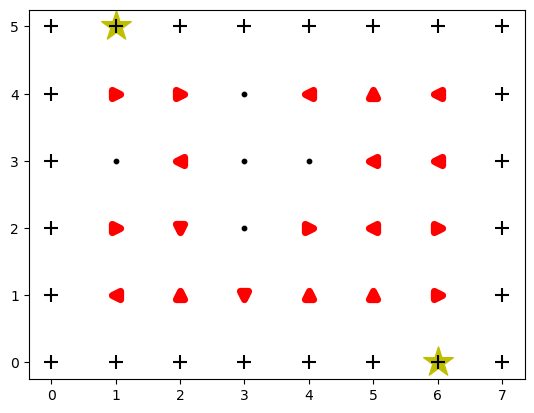

In [166]:
plt.scatter(start.real, start.imag, c='y', marker ='*', s =500)
plt.scatter(end.real, end.imag, c='y', marker ='*', s = 500)


for j,row in enumerate(data):
    for i, symb in enumerate(row):
        if symb in blz_symbs:
            plt.scatter(i, My-j, c='r')
        elif is_in_grid(i + (My-j)*1j):
            plt.scatter(i,My-j,c='k',s = 10)
        else:
            plt.scatter(i,My-j,c='k',s = 100, marker = '+')
        
# for loc in finalpath:
#     plt.scatter(loc.real, loc.imag, c='k')
    
for loc,m in zip(init_snowflakes_locs,snowflakes_symbs):
    plt.scatter(loc.real, loc.imag, c='r', marker = m, lw=5)

KeyError: (1+4j)

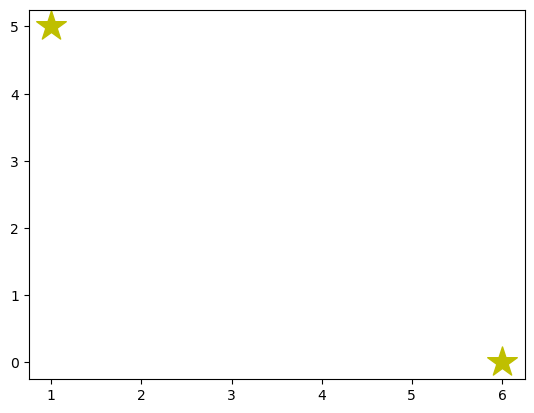

In [171]:

plt.scatter(start.real, start.imag, c='y', marker ='*', s =500)
plt.scatter(end.real, end.imag, c='y', marker ='*', s = 500)

snowflakes_locs = [move(loc, symb) for loc, symb in zip(snowflakes_locs, init_snowflakes_locs)]

for j,row in enumerate(data):
    for i, symb in enumerate(row):
        if symb in blz_symbs:
            plt.scatter(i, My-j, c='r')
        elif is_in_grid(i + (My-j)*1j):
            plt.scatter(i,My-j,c='k',s = 10)
        else:
            plt.scatter(i,My-j,c='k',s = 100, marker = '+')
        
# for loc in finalpath:
#     plt.scatter(loc.real, loc.imag, c='k')
    
for loc,m in zip(init_snowflakes_locs,snowflakes_symbs):
    plt.scatter(loc.real, loc.imag, c='r', marker = m, lw=5)

In [111]:
paths

[[(1+7j),
  (1+6j),
  (2+6j),
  (3+6j),
  (4+6j),
  (5+6j),
  (6+6j),
  (5+6j),
  (6+6j),
  (5+6j),
  (6+6j)],
 [(1+7j),
  (1+6j),
  (2+6j),
  (3+6j),
  (4+6j),
  (5+6j),
  (6+6j),
  (5+6j),
  (6+6j),
  (5+6j),
  (4+6j)],
 [(1+7j),
  (1+6j),
  (2+6j),
  (3+6j),
  (4+6j),
  (5+6j),
  (6+6j),
  (5+6j),
  (6+6j),
  (5+6j),
  (5+5j)],
 [(1+7j),
  (1+6j),
  (2+6j),
  (3+6j),
  (4+6j),
  (5+6j),
  (6+6j),
  (5+6j),
  (6+6j),
  (6+5j),
  (5+5j)],
 [(1+7j),
  (1+6j),
  (2+6j),
  (3+6j),
  (4+6j),
  (5+6j),
  (6+6j),
  (5+6j),
  (6+6j),
  (6+5j),
  (6+6j)],
 [(1+7j),
  (1+6j),
  (2+6j),
  (3+6j),
  (4+6j),
  (5+6j),
  (6+6j),
  (5+6j),
  (6+6j),
  (6+5j),
  (6+4j)],
 [(1+7j),
  (1+6j),
  (2+6j),
  (3+6j),
  (4+6j),
  (5+6j),
  (6+6j),
  (5+6j),
  (4+6j),
  (5+6j),
  (6+6j)],
 [(1+7j),
  (1+6j),
  (2+6j),
  (3+6j),
  (4+6j),
  (5+6j),
  (6+6j),
  (5+6j),
  (4+6j),
  (5+6j),
  (4+6j)],
 [(1+7j),
  (1+6j),
  (2+6j),
  (3+6j),
  (4+6j),
  (5+6j),
  (6+6j),
  (5+6j),
  (4+6j),
  (5+6j),
  (5+5j)],
 

In [93]:



should_break = False
# for i in range(1):
    snowflakes_locs = [move(loc, symb) for loc, symb in zip(snowflakes_locs, snowflakes_symbs)]
    occupied = set(snowflakes_locs)
    
    next_paths = paths.copy()
    for path in paths:
        possibilities = possible_next_steps(path[-1], occupied)
        for choice in possibilities:
            next_paths.append(path + [choice])
    paths = next_paths.copy()
    
    for path in paths:
        if path[-1] == my_end:
            should_break = True; len_path = len(path)
    if should_break:
        break
        print(len_path)
        

IndentationError: unexpected indent (1756679996.py, line 15)

----

## snippets

In [416]:
data = np.array(open('input_24.txt').read().split('\n'))
# data = np.array(open('test_24.txt').read().split('\n'))

mx = 0; Mx = len(data[0]) - 1
my = 0; My = len(data) - 1 

blz_symbs = ['>','<','v','^']

snowflakes_locs = []
snowflakes_symbs = []
for j,row in enumerate(data):
    for i, symb in enumerate(row):
        if j == 0 and symb == '.':
            start = i + ( My-j)*1j
        if j == len(data)-1 and symb == '.':
            end = i + ( My-j)*1j
        if symb in blz_symbs:
            snowflakes_locs.append(i +( My-j)*1j)
            snowflakes_symbs.append(symb)

            
init_snowflakes_locs = snowflakes_locs.copy()

dict_move = {'>' : 1 ,'<' : -1,'v' : -1j,'^':1j}

teleport = {'>' : mx+1, '<' : Mx -1 ,'v' :(My -1)*1j ,'^' : (my+1)*1j}

def invariant(loc):
    return {'>' : loc.imag*1j, '<' : loc.imag*1j ,'v' : loc.real ,'^' : loc.real}

def is_in_grid(loc):
    if loc == start or loc ==end:
        return True
    else:
        return all([loc.real> mx, loc.real< Mx, loc.imag> my, loc.imag< My])

def move(loc, symb):
    new_loc = loc + dict_move[symb]
    if is_in_grid(new_loc):
        return new_loc
    else:
        return invariant(loc)[symb] + teleport[symb] 

def manhattan(a, b):
    return abs(a.real-b.real) + abs(a.imag-b.imag) 

deltas = [1,-1,1j,-1j,0]
def possible_next_steps(loc, occupied):
    return [loc + delta for delta in deltas if (is_in_grid(loc + delta) and (loc + delta not in occupied))]
    

paths = [[start]]

snowflakes_locs = init_snowflakes_locs.copy()
should_break = False


MAXITER = 30; counter = 0
while len(paths)>0:
    snowflakes_locs = [move(loc, symb) for loc, symb in zip(snowflakes_locs, snowflakes_symbs)]
    occupied = set(snowflakes_locs)
    
    next_paths = []
    for path in paths:
        possibilities = 
        if len(possibilities) >0:
            for choice in possibilities:
                next_paths.append(path + [choice])
        else:
            None
            
    paths = next_paths.copy()

    for path in paths:
        if path[-1] == end:
            should_break = True; len_path = len(path); finalpath = path

    if should_break:
        print(len_path-1);       
        break

    counter+=1 
    if counter >MAXITER:
        print('Stopped!')
        break
        
    print(counter)

    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


KeyboardInterrupt: 

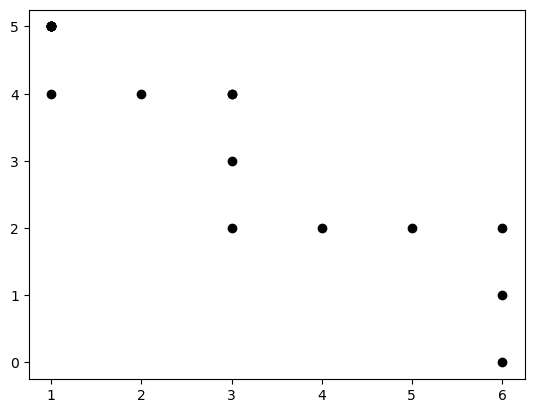

In [388]:
for loc in finalpath:
    plt.scatter(loc.real, loc.imag, c='k')

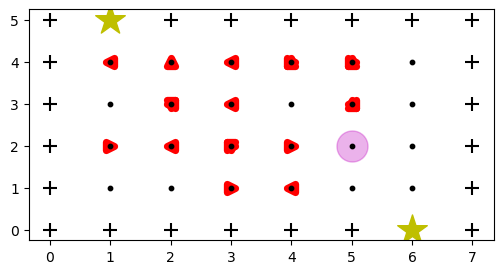

In [379]:
step = 15
snowflakes_locs = init_snowflakes_locs.copy()


fig,ax = plt.subplots(figsize = (6,3))

ax.scatter(finalpath[step].real, finalpath[step].imag, c='m', s =500, alpha = .3)



for _ in range(step):
    snowflakes_locs = [move(loc, symb) for loc, symb in zip(snowflakes_locs, snowflakes_symbs)]

for loc,m in zip(snowflakes_locs,snowflakes_symbs):
    ax.scatter(loc.real, loc.imag, c='r', marker = m, lw=5)
snowflakes_locs = [move(loc, symb) for loc, symb in zip(snowflakes_locs, snowflakes_symbs)]

for j,row in enumerate(data):
    for i, symb in enumerate(row):
        if is_in_grid(i + (My-j)*1j):
            ax.scatter(i,My-j,c='k',s = 10)
        else:
            ax.scatter(i,My-j,c='k',s = 100, marker = '+')

ax.scatter(start.real, start.imag, c='y', marker ='*', s =500)
ax.scatter(end.real, end.imag, c='y', marker ='*', s = 500)


In [380]:
paths

[]

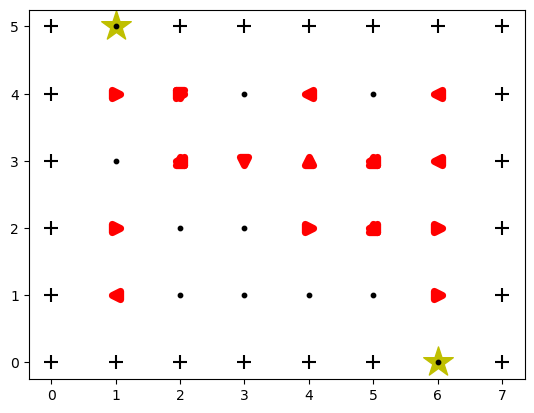

In [333]:
fig, ax = plt.subplots()
ax.scatter(start.real, start.imag, c='y', marker ='*', s =500)
ax.scatter(end.real, end.imag, c='y', marker ='*', s = 500)


for j,row in enumerate(data):
    for i, symb in enumerate(row):
        if is_in_grid(i + (My-j)*1j):
            ax.scatter(i,My-j,c='k',s = 10)
        else:
            ax.scatter(i,My-j,c='k',s = 100, marker = '+')

# for loc in paths[60]:
#     plt.scatter(loc.real, loc.imag, c='k')

for loc,m in zip(snowflakes_locs,snowflakes_symbs):
    ax.scatter(loc.real, loc.imag, c='r', marker = m, lw=5)
snowflakes_locs = [move(loc, symb) for loc, symb in zip(snowflakes_locs, snowflakes_symbs)]


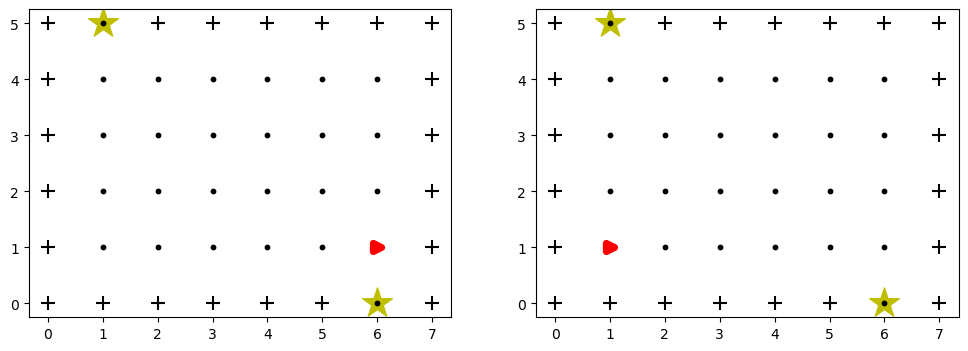

In [279]:
# check
# snowflakes_locs = init_snowflakes_locs
# fig, axs = plt.subplots(figsize = (12,4), ncols = 2)
    
# for ax in axs:

#     ax.scatter(start.real, start.imag, c='y', marker ='*', s =500)
#     ax.scatter(end.real, end.imag, c='y', marker ='*', s = 500)


#     for j,row in enumerate(data):
#         for i, symb in enumerate(row):
#             if is_in_grid(i + (My-j)*1j):
#                 ax.scatter(i,My-j,c='k',s = 10)
#             else:
#                 ax.scatter(i,My-j,c='k',s = 100, marker = '+')

#     # for loc in finalpath:
#     #     plt.scatter(loc.real, loc.imag, c='k')

#     for loc,m in zip(snowflakes_locs,snowflakes_symbs):
#         ax.scatter(loc.real, loc.imag, c='r', marker = m, lw=5)
#     snowflakes_locs = [move(loc, symb) for loc, symb in zip(snowflakes_locs, snowflakes_symbs)]
        

In [ ]:
# # snippets

# fig,ax = plt.subplots(figsize = (9,5))

# d = 500
# mu = np.zeros(d)
# time = np.linspace(0,1,d)
# cov = np.array([[min([i/d,j/d]) for i in range(d)] for j in range(d)])
# X = np.random.multivariate_normal(mu,cov)
# ax.plot(time, X, lw= 2,alpha=.91)

# gr = 10
# ax.scatter(time[::gr], X[::gr], c='r',alpha=1, lw=2,s=50, marker='x')
# plt.axis('off')
# plt.show()

# import random 
# fig,axs = plt.subplots(figsize = (9,15), nrows=4); axs=axs.ravel()

# for i,r,ax in zip(range(4), [3,5,2,7], axs):
#     d = 500
#     mu = np.zeros(d)
#     time = np.linspace(0,1,d)
#     cov = np.array([[min([i/d,j/d]) for i in range(d)] for j in range(d)])
#     X = np.random.multivariate_normal(mu,cov)
#     ax.plot(time, X, lw= 2,alpha=.9)

#     gr = 10
#     where = random.sample(list(np.arange(d)), r)
#     ax.scatter(time[where], X[where], c='r', lw=1)
    
#     errors = np.random.multivariate_normal(mu,.4*cov)
#     Y=X+errors
#     ax.scatter(time[where], Y[where], c='r',alpha=.9, lw=3,s=100, marker ='x')
#     for t,x,y in zip(time[where], X[where], Y[where]):
#         ax.vlines(t,x,y, linestyles = 'dashed', lw=1, color='r', alpha = .6  )
#     ax.axis('off')
# plt.show()

# import random 
# fig,axs = plt.subplots(figsize = (20,4), ncols=4); axs=axs.ravel()

# for i,r,ax in zip(range(4), [3,5,2,7], axs):
#     d = 500
#     mu = np.zeros(d)
#     time = np.linspace(0,1,d)
#     cov = np.array([[min([i/d,j/d]) for i in range(d)] for j in range(d)])
#     X = np.random.multivariate_normal(mu,cov)
#     ax.plot(time, X, lw= 2,alpha=.9)

#     gr = 10
#     where = random.sample(list(np.arange(d)), r)
#     ax.scatter(time[where], X[where], c='r', lw=1)
    
#     errors = np.random.multivariate_normal(mu,.4*cov)
#     Y=X+errors
#     ax.scatter(time[where], Y[where], c='r',alpha=.9, lw=3,s=100, marker ='x')
#     for t,x,y in zip(time[where], X[where], Y[where]):
#         ax.vlines(t,x,y, linestyles = 'dashed', lw=1, color='r', alpha = .6  )
#     ax.axis('off')
# plt.show()

# t

In [409]:

from os import path
import itertools
from dataclasses import dataclass

BLIZZARDS = ">v<^"
DIRS = ((1, 0), (0, 1), (-1, 0), (0, -1))


@dataclass
class Blizzard:
    d: int
    x: int
    y: int

    def move(self):
        dx, dy = DIRS[self.d]
        nx, ny = self.x + dx, self.y + dy
        if 0 <= nx < width and 0 <= ny < height:
            self.x, self.y = nx, ny
        elif self.d == 0:
            self.x = 0
        elif self.d == 1:
            self.y = 0
        elif self.d == 2:
            self.x = width - 1
        else:
            self.y = height - 1


def shortest_path(start, target):
    pos = {start}
    for i in itertools.count():
        free = set((x, y) for x in range(width) for y in range(height))
        free.add(start)
        free.add(target)
        for b in blizzards:
            b.move()
            free -= {(b.x, b.y)}
        new_pos = set()
        for x, y in pos:
            new_pos.add((x, y))
            for dx, dy in DIRS:
                new_pos.add((x + dx, y + dy))
        pos = new_pos & free
        if target in pos:
            return i + 1


with open( "input_24.txt") as f:
    grid = [line[1:-1] for line in f.read().splitlines()[1:-1]]

width = len(grid[0])
height = len(grid)

blizzards = []
for y, line in enumerate(grid):
    for x, c in enumerate(line):
        if c in BLIZZARDS:
            blizzards.append(Blizzard(BLIZZARDS.index(c), x, y))

start = (0, -1)
target = (width - 1, height)
part1 = shortest_path(start, target)
print("Part 1:", part1)
print("Part 2:", part1 + shortest_path(target, start) + shortest_path(start, target))

Part 1: 297
Part 2: 856
